In [3]:
import pandas as pd
import numpy as np
import glob
import os
import statsmodels as sm
from IPython.display import display, Math, Latex

import dask.dataframe as dd

import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_parquet('time_features_data_monthly_fixed_organisation_after_2020-12_cleaned.parquet.gzip')
data.head(5)

organisation    month    ts_Std   ts_Mean  ts_Sum  ts_Min  ts_Max  ts_range  \
0       Esprit  2022-01  1.265017  1.611043  611473       0      55        55   
1       Esprit  2022-02  1.293972  1.636785  549711       0      85        85   
2       Esprit  2022-03  1.328397  1.661481  637221       0      71        71   
3       Esprit  2022-04  1.327055  1.671280  583830       0      45        45   
4       Esprit  2022-05  1.345151  1.684901  632665       0      67        67   

   ts_05  ts_10  ts_25  ts_50  ts_75  ts_90  
0    1.0    1.0    1.0    1.0    2.0    3.0  
1    1.0    1.0    1.0    1.0    2.0    3.0  
2    1.0    1.0    1.0    1.0    2.0    3.0  
3    1.0    1.0    1.0    1.0    2.0    3.0  
4    1.0    1.0    1.0    1.0    2.0    3.0

In [4]:
data.shape

(460, 14)

## Add Industry

In [6]:
industry = pd.read_excel('../data_biz/Futurae Installbase - Kati.xlsx')
industry_dict = dict(zip(industry['Company Name'],industry.Industry))
data['industry'] = data['organisation'].map(industry_dict)
banks = ['Zuercher Landbank','Bank Avera','SZKB', 'Rothschild & Co', 'Lienhardt & Partner Privatbank Zürich','Valiant','Banca Credinvest', 'Artbanx']
data.loc[data.organisation.isin(banks),'industry'] = 'Banking'

In [7]:
data.industry.value_counts()

Banking                        136
Financial Services              71
Computer Software               67
IT & Services                   40
Insurance                       20
Hospital & Health Care          20
NPO Management                  10
Investment Banking              10
Construction                    10
Oil & Energy                    10
Accounting                      10
Computer & Network Security      8
Name: industry, dtype: int64

## Mean vs. Std

['Qonto', 'Esprit', 'Clientis', 'VZ Depotbank', 'Viva Wallet', 'Johanniter Unfall Hilfe e.V.', 'Avaloq Sourcing Europe AG', 'Bank Avera', 'KPT Krankenkasse AG', 'Santander Consumer']


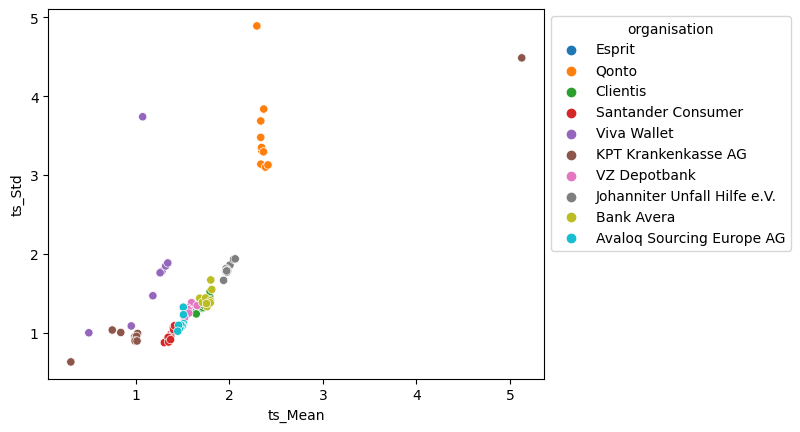

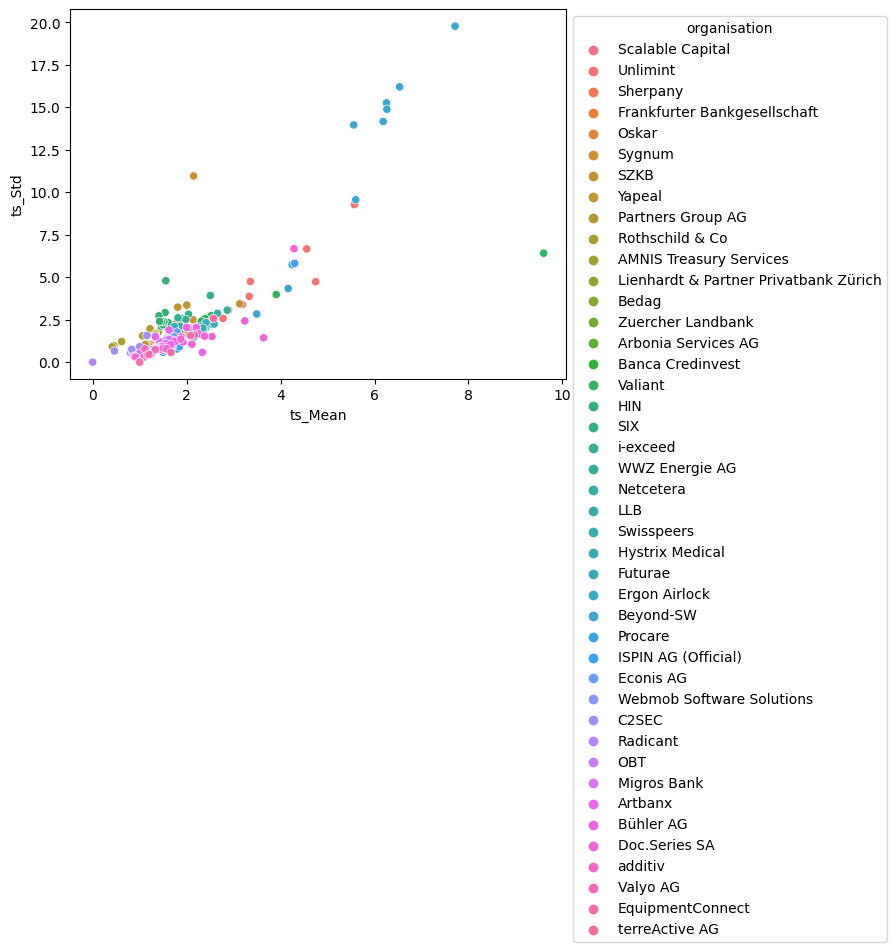

In [8]:
top10_orgs = data.groupby('organisation')['ts_Sum'].sum().sort_values(ascending=False).iloc[:10].index.tolist()
print(top10_orgs)

tmp = data.copy()
tmp['Top10'] = tmp.organisation.isin(top10_orgs)

ax1 = sns.scatterplot(data=tmp[tmp.organisation.isin(top10_orgs)], x='ts_Mean', y='ts_Std', hue='organisation')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1))
plt.show()

ax2 = sns.scatterplot(data=tmp[~tmp.organisation.isin(top10_orgs)], x='ts_Mean', y='ts_Std', hue='organisation')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
plt.show()

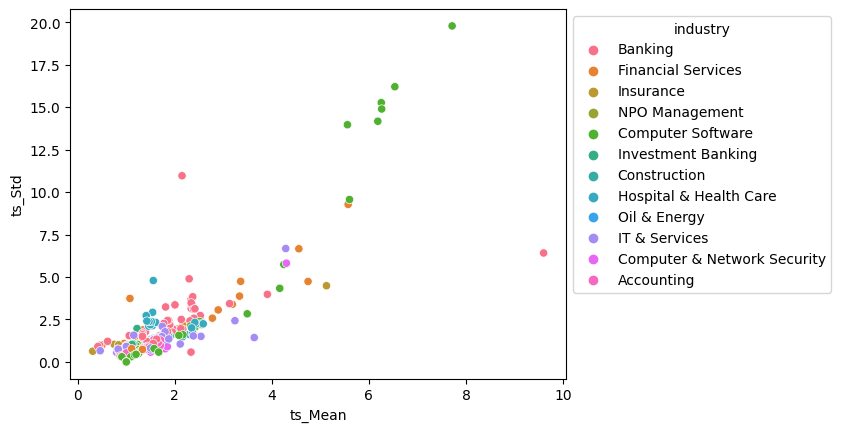

In [9]:
ax2 = sns.scatterplot(data=tmp, x='ts_Mean', y='ts_Std', hue='industry')
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [10]:
cols = data.columns.tolist()
kpis = list(filter(lambda k: 'ts_' in k, cols))

number of organisations in data set 53


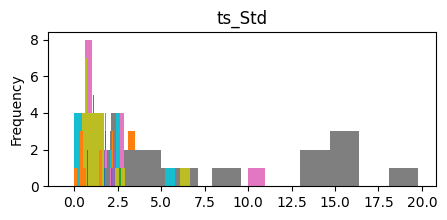

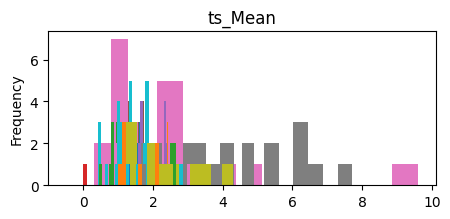

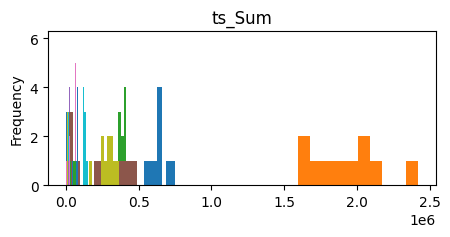

In [11]:
orgs = data.organisation.unique().tolist()
print('number of organisations in data set', len(orgs))

for col in kpis[:3]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 2))
    for org in orgs:
        tmp = data[data.organisation==org]
        #print(tmp.head(3))
        ax = tmp[col].plot(kind='hist',stacked=True)
        ax.set_title(col)
    plt.show()

number of industries in data set 13


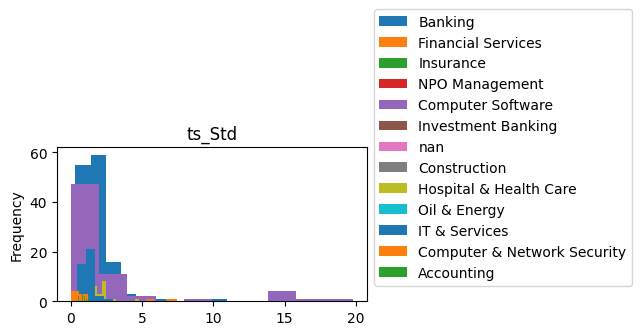

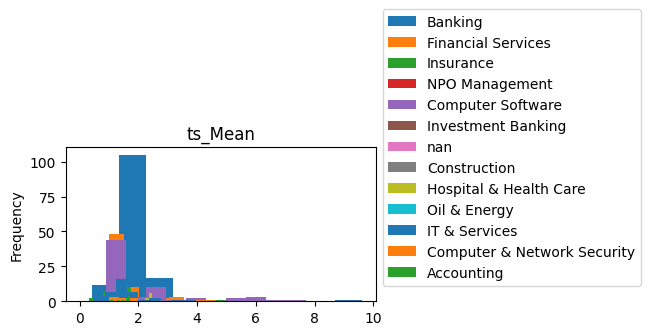

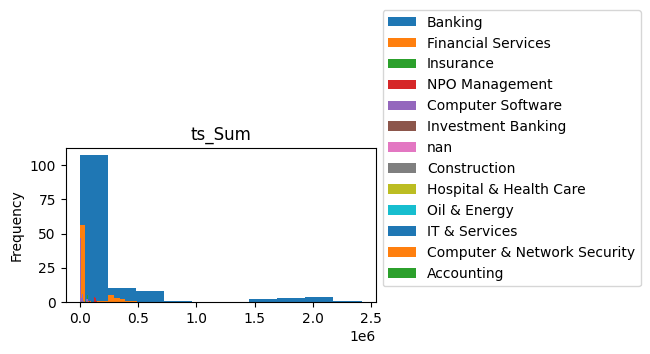

In [12]:
inds = data.industry.unique().tolist()
print('number of industries in data set', len(inds))
labels=inds

for col in kpis[:3]:
    fig, ax = plt.subplots(1, 1, figsize=(5, 2))
    for ind in inds:
        tmp = data[data.industry==ind]
        ax = tmp[col].plot(kind='hist', label=ind)
        ax.set_title(col)
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 1))
    plt.show()

('ts_Std', 'ts_Mean')


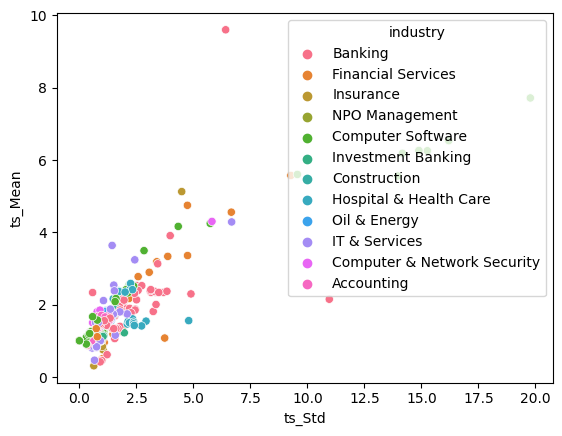

('ts_Std', 'ts_Sum')


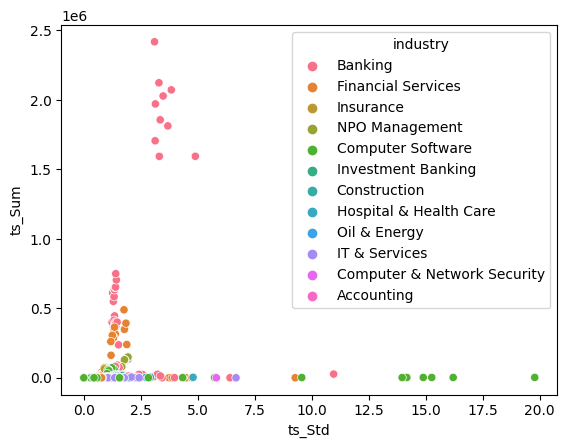

('ts_Std', 'ts_Min')


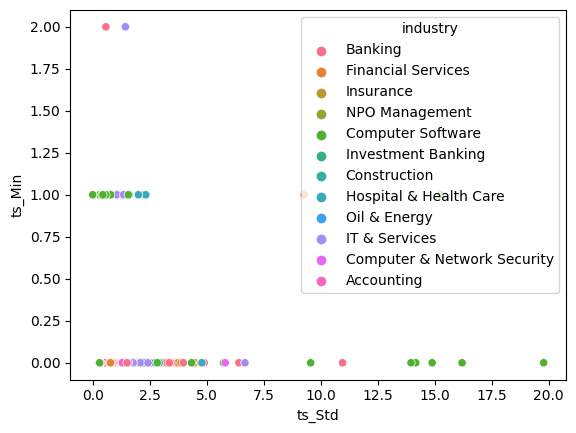

('ts_Std', 'ts_Max')


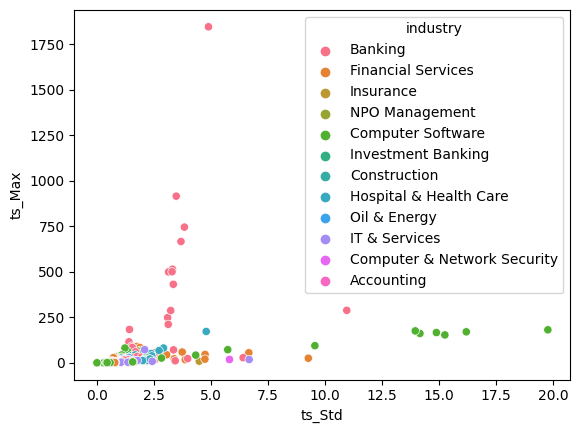

('ts_Std', 'ts_range')


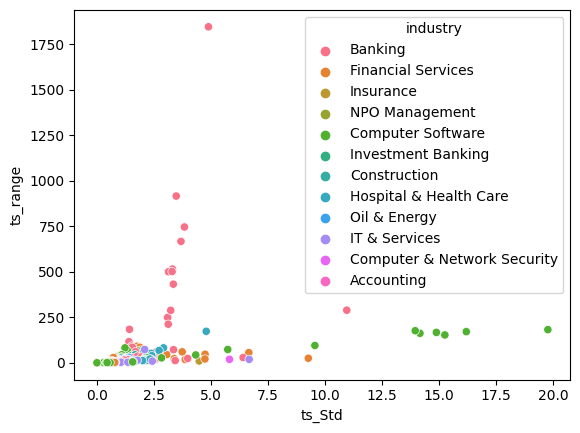

('ts_Std', 'ts_05')


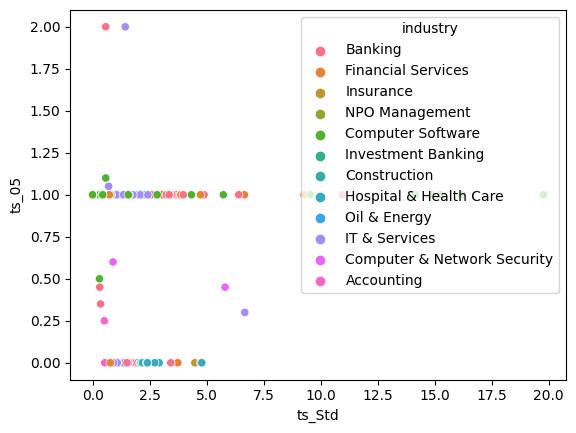

('ts_Std', 'ts_10')


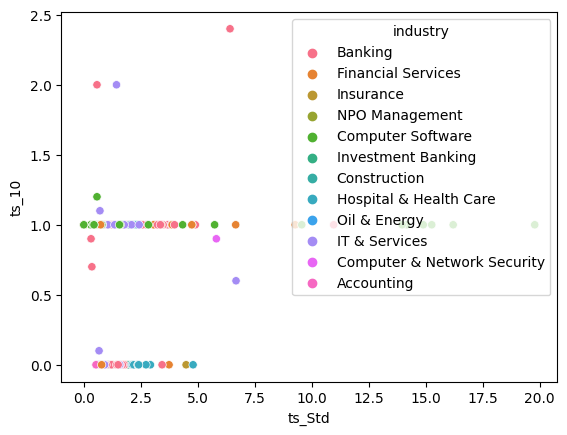

('ts_Std', 'ts_25')


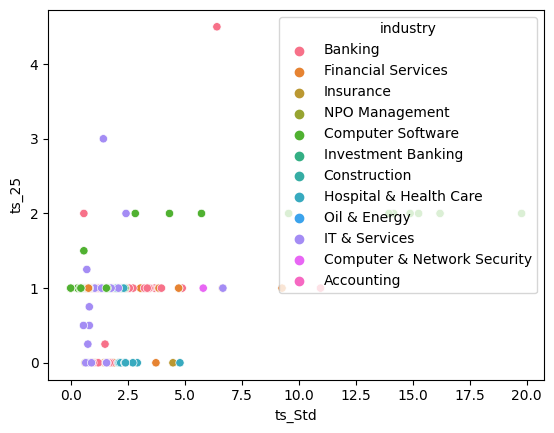

('ts_Std', 'ts_50')


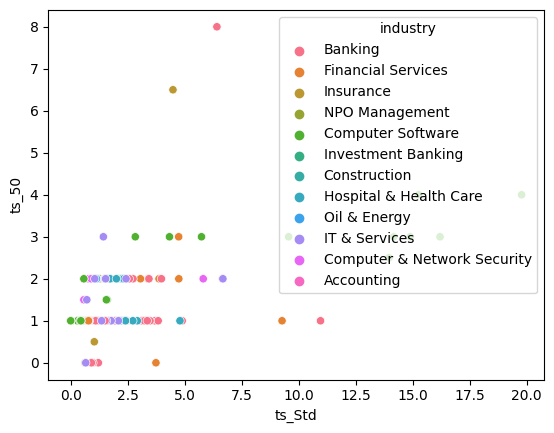

('ts_Std', 'ts_75')


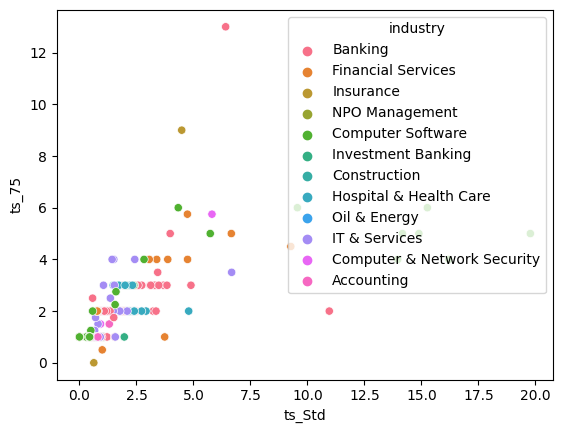

('ts_Std', 'ts_90')


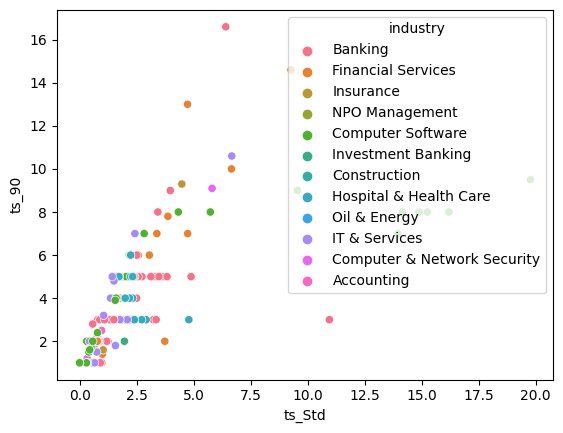

('ts_Mean', 'ts_Sum')


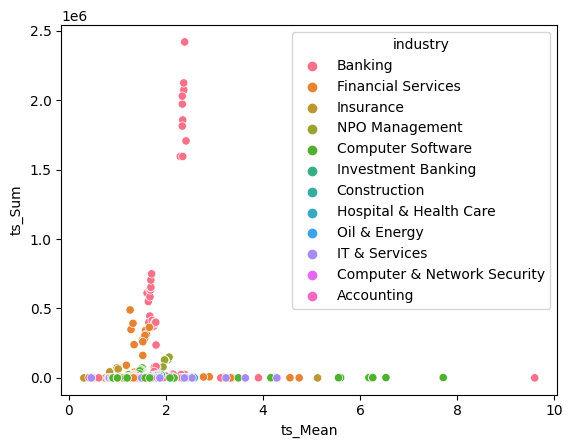

('ts_Mean', 'ts_Min')


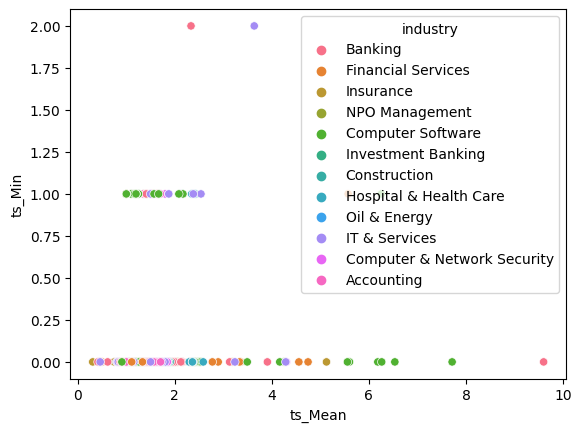

('ts_Mean', 'ts_Max')


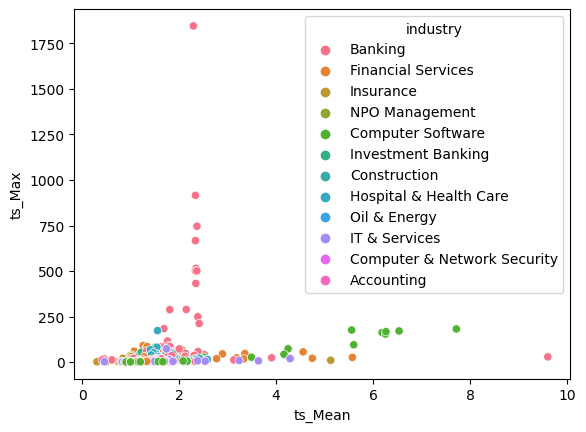

('ts_Mean', 'ts_range')


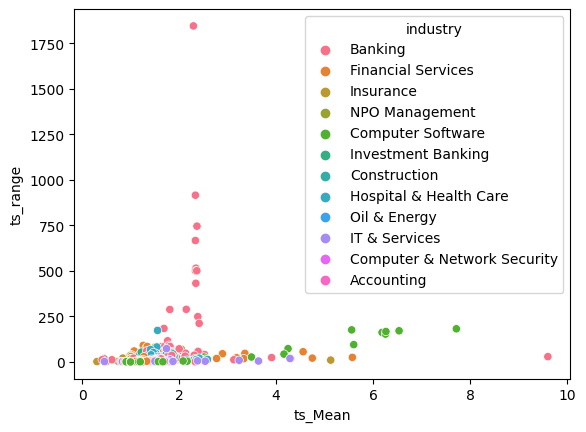

('ts_Mean', 'ts_05')


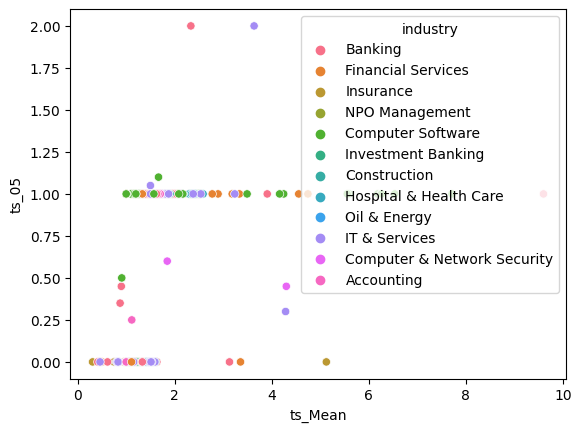

('ts_Mean', 'ts_10')


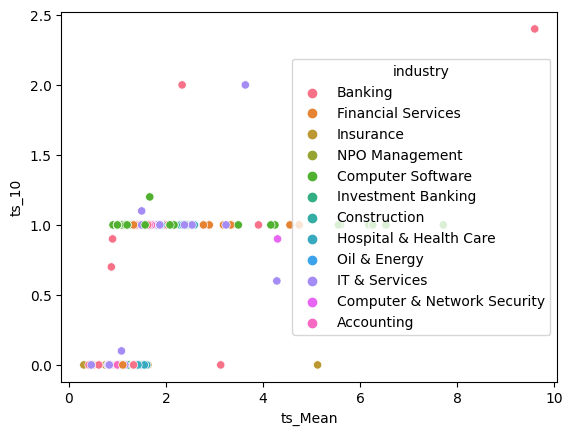

('ts_Mean', 'ts_25')


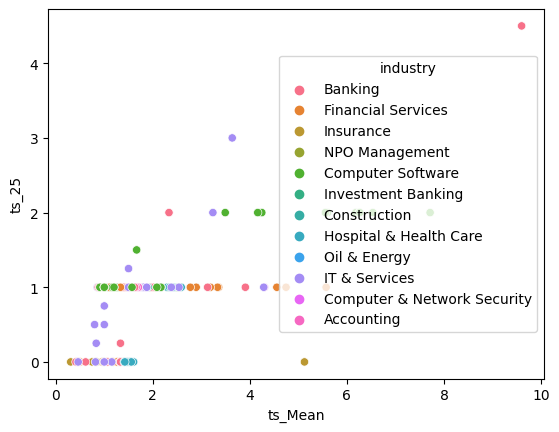

('ts_Mean', 'ts_50')


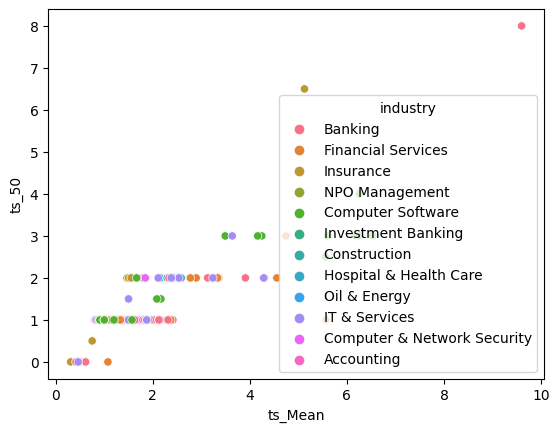

('ts_Mean', 'ts_75')


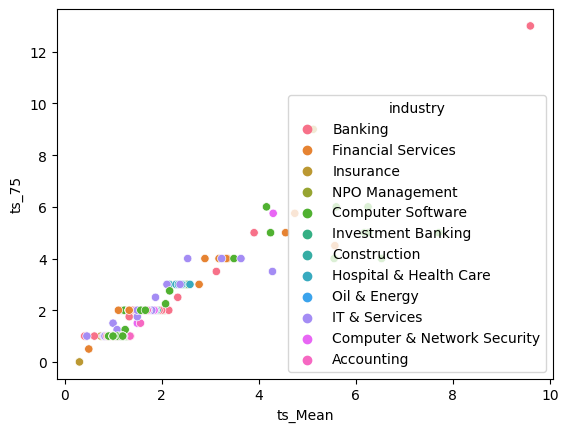

('ts_Mean', 'ts_90')


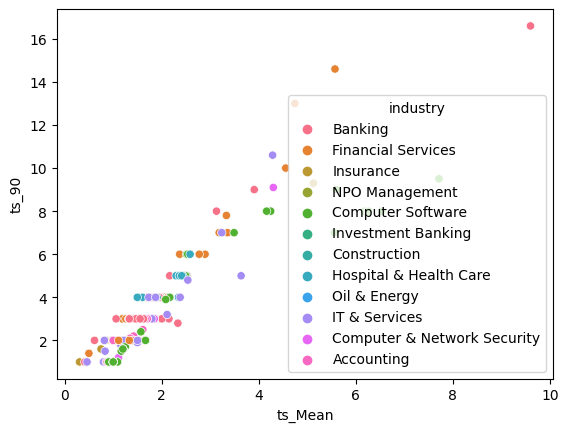

('ts_Sum', 'ts_Min')


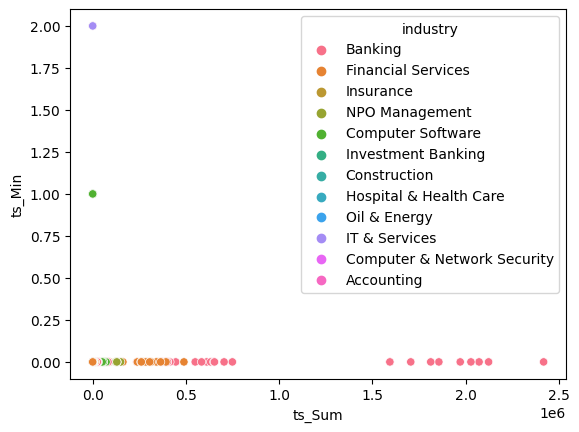

('ts_Sum', 'ts_Max')


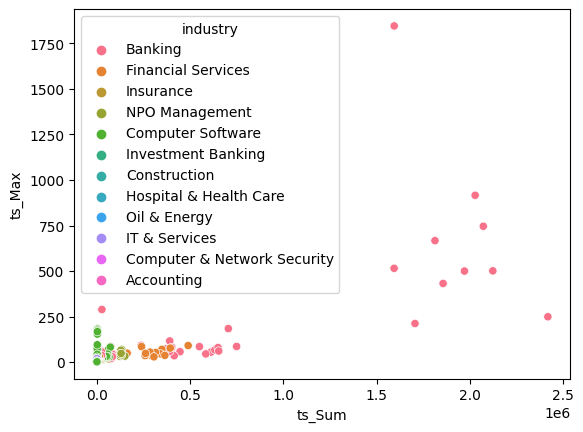

('ts_Sum', 'ts_range')


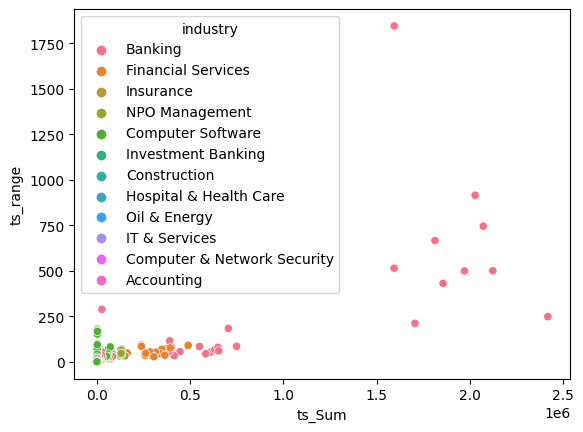

('ts_Sum', 'ts_05')


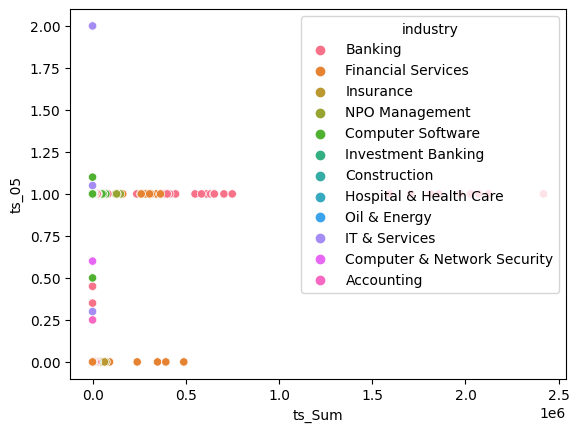

('ts_Sum', 'ts_10')


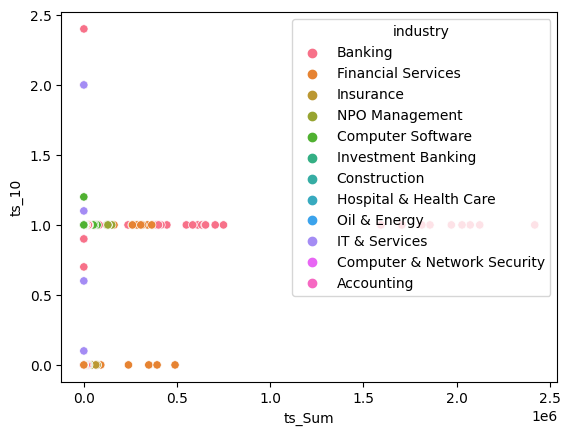

('ts_Sum', 'ts_25')


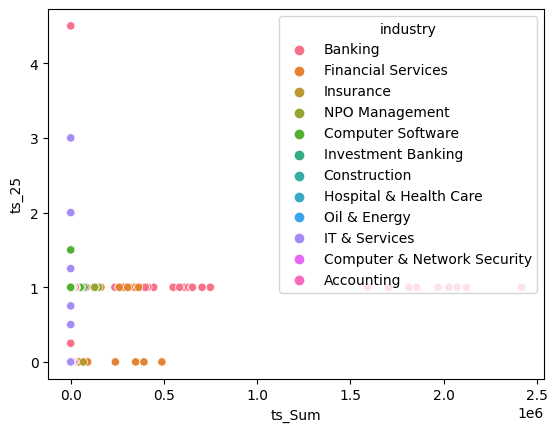

('ts_Sum', 'ts_50')


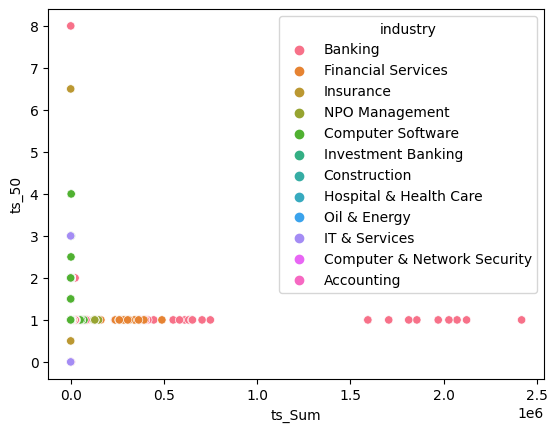

('ts_Sum', 'ts_75')


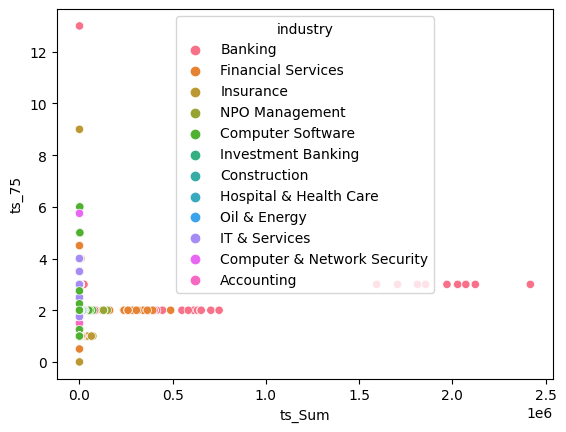

('ts_Sum', 'ts_90')


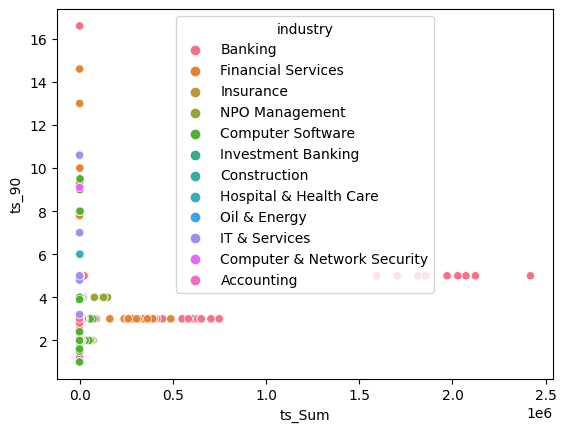

('ts_Min', 'ts_Max')


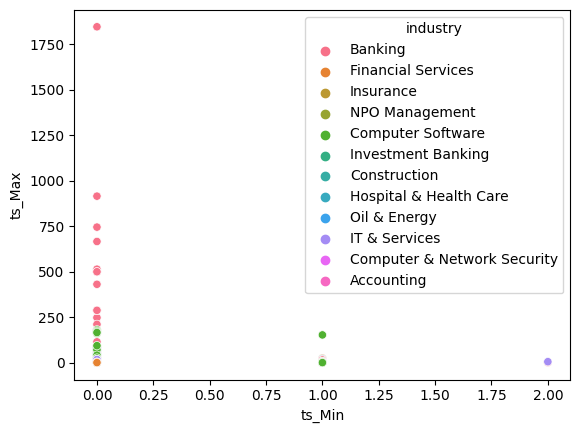

('ts_Min', 'ts_range')


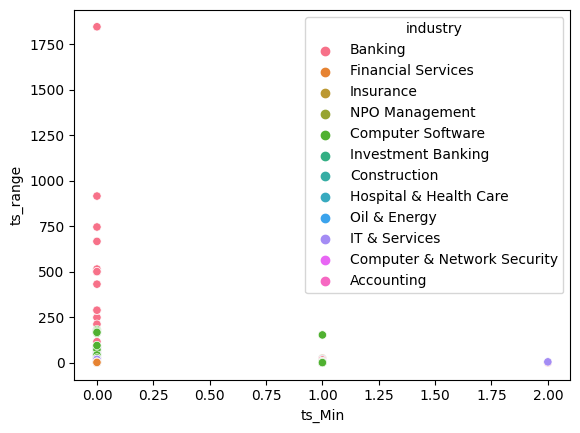

('ts_Min', 'ts_05')


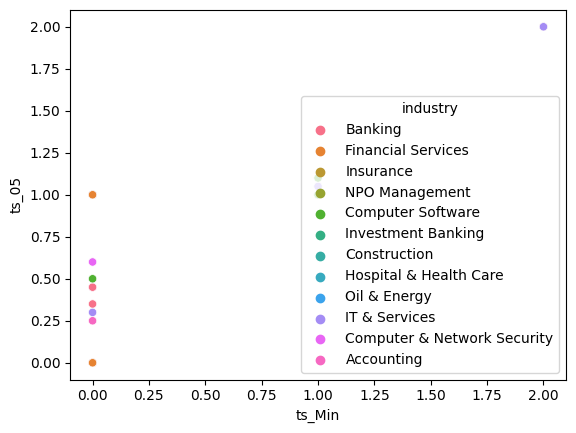

('ts_Min', 'ts_10')


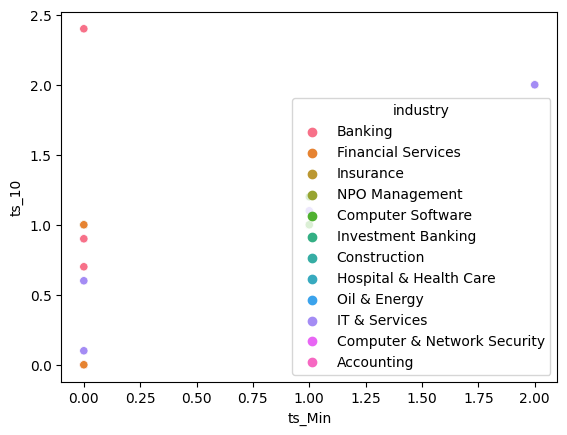

('ts_Min', 'ts_25')


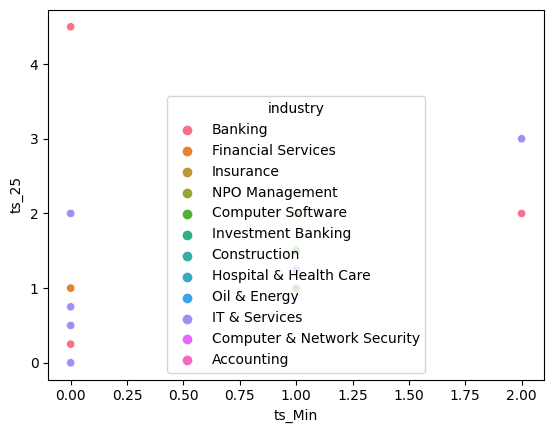

('ts_Min', 'ts_50')


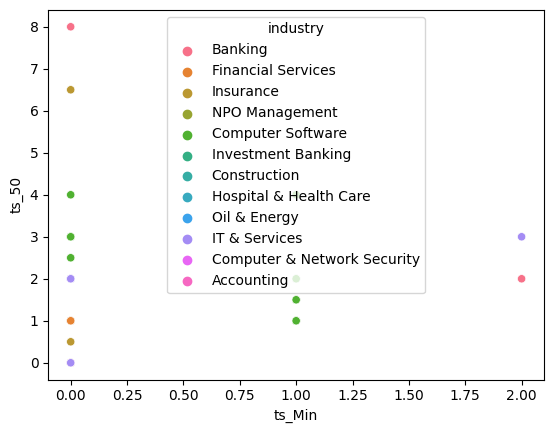

('ts_Min', 'ts_75')


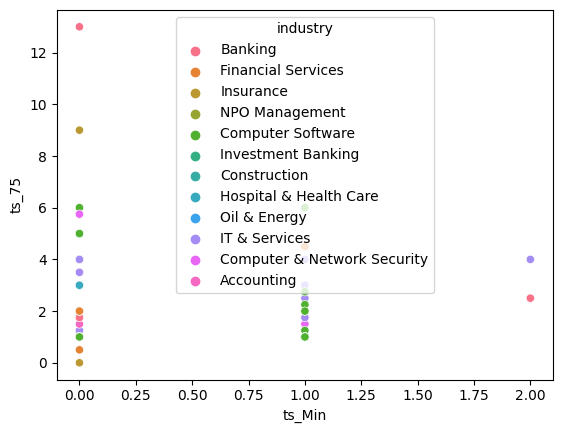

('ts_Min', 'ts_90')


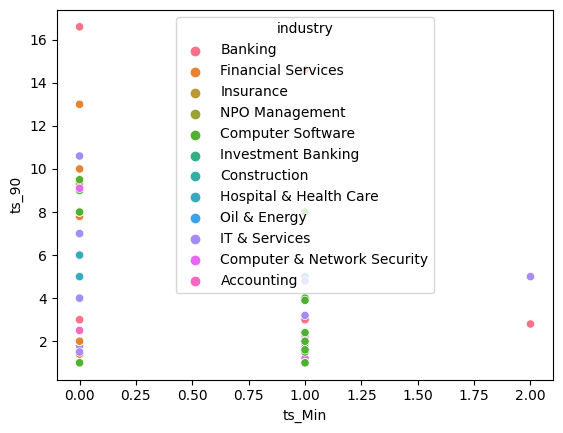

('ts_Max', 'ts_range')


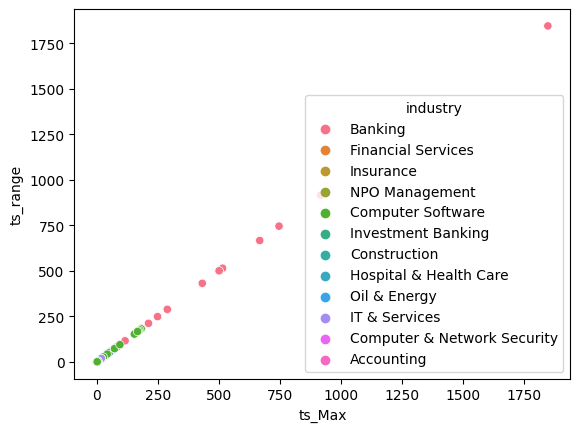

('ts_Max', 'ts_05')


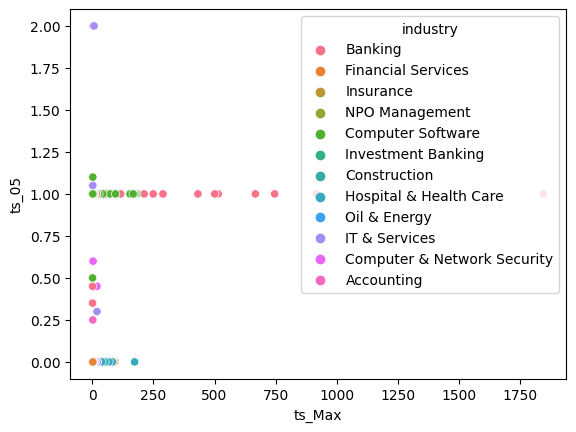

('ts_Max', 'ts_10')


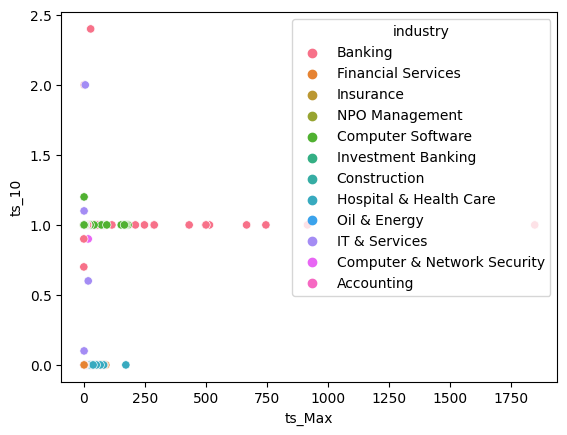

('ts_Max', 'ts_25')


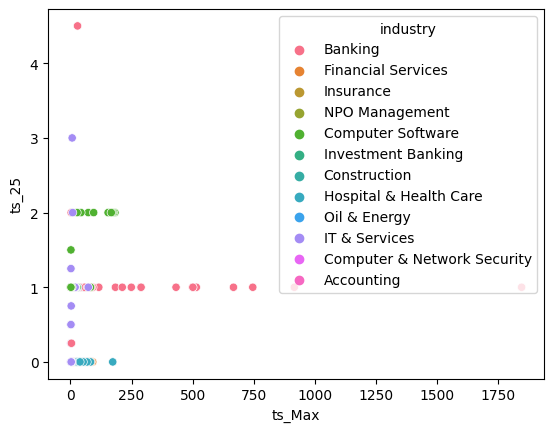

('ts_Max', 'ts_50')


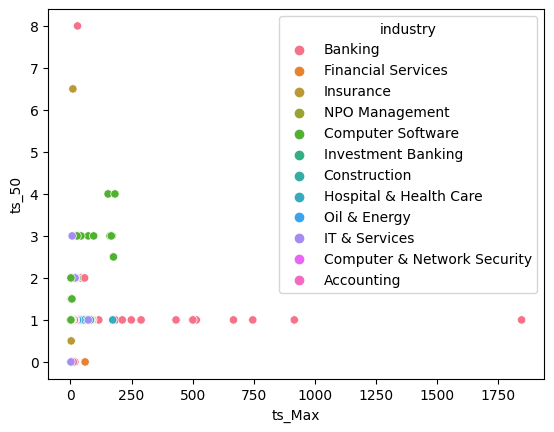

('ts_Max', 'ts_75')


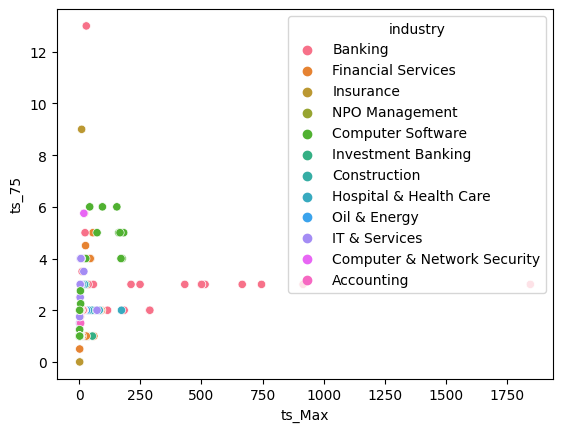

('ts_Max', 'ts_90')


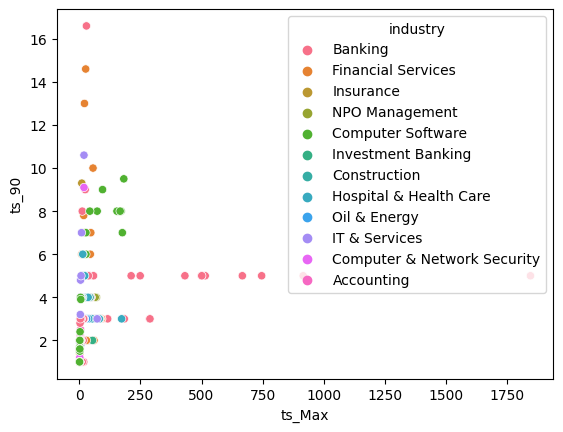

('ts_range', 'ts_05')


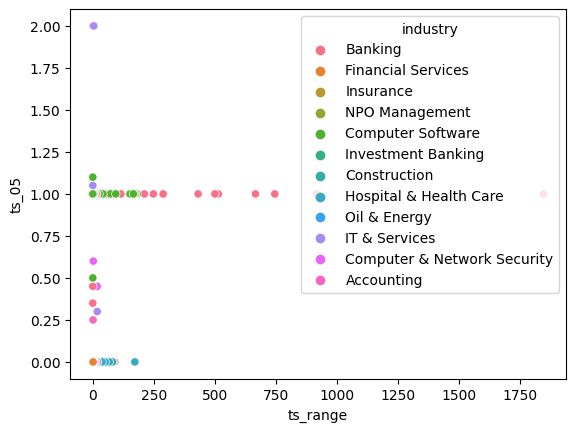

('ts_range', 'ts_10')


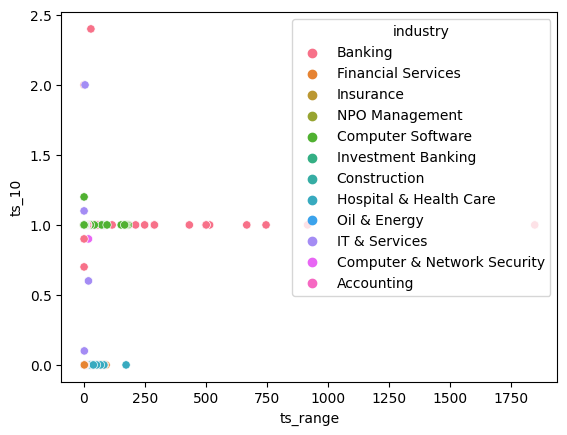

('ts_range', 'ts_25')


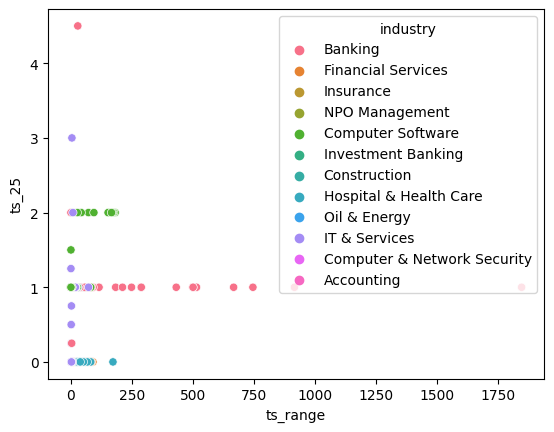

('ts_range', 'ts_50')


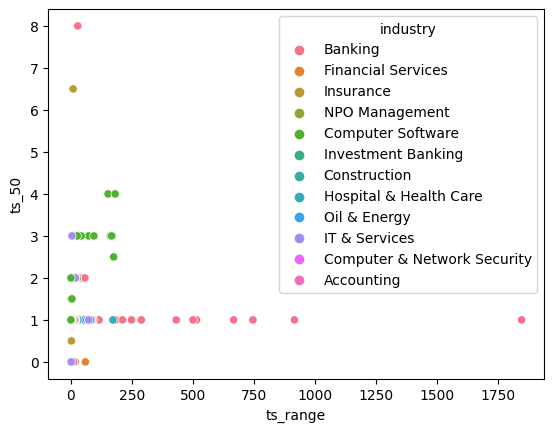

('ts_range', 'ts_75')


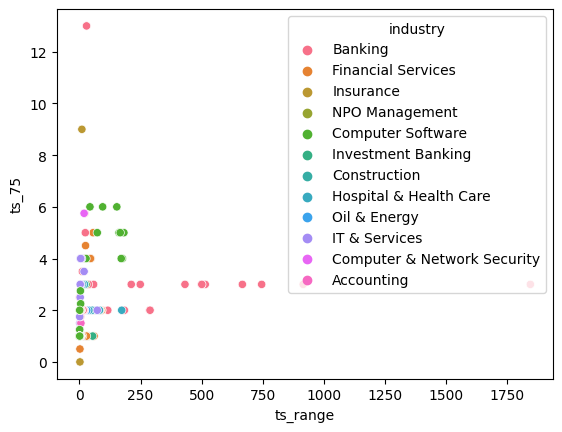

('ts_range', 'ts_90')


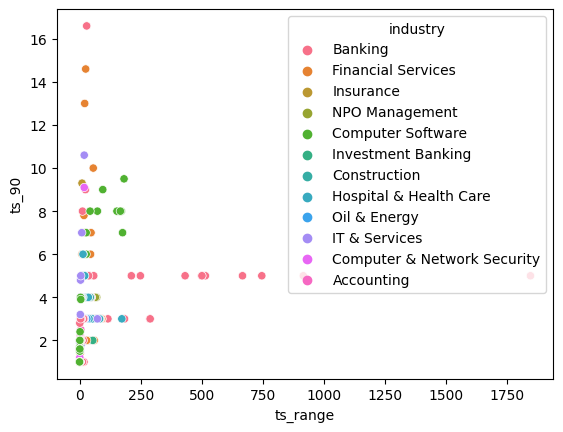

('ts_05', 'ts_10')


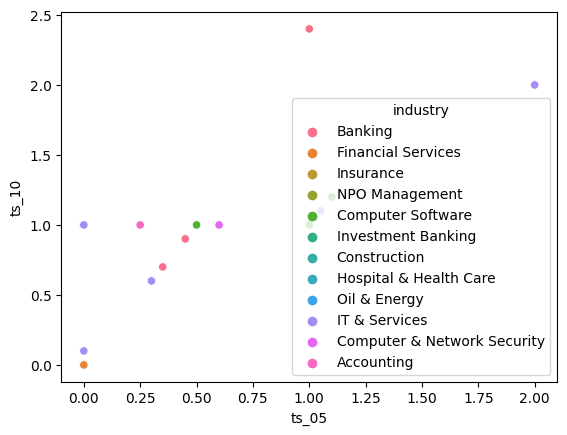

('ts_05', 'ts_25')


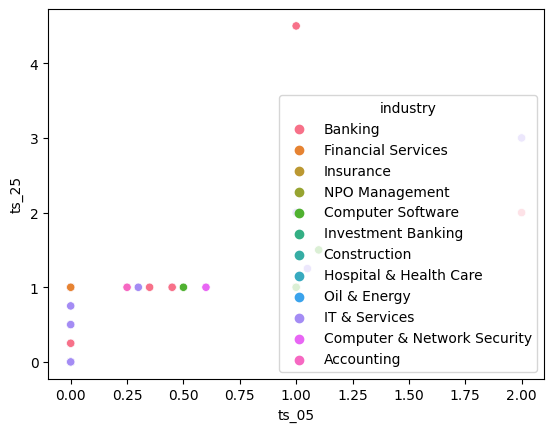

('ts_05', 'ts_50')


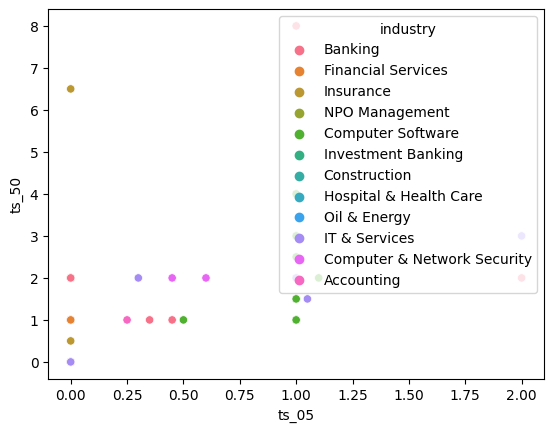

('ts_05', 'ts_75')


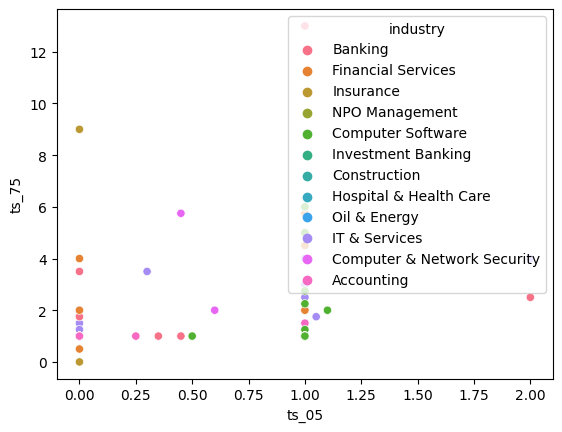

('ts_05', 'ts_90')


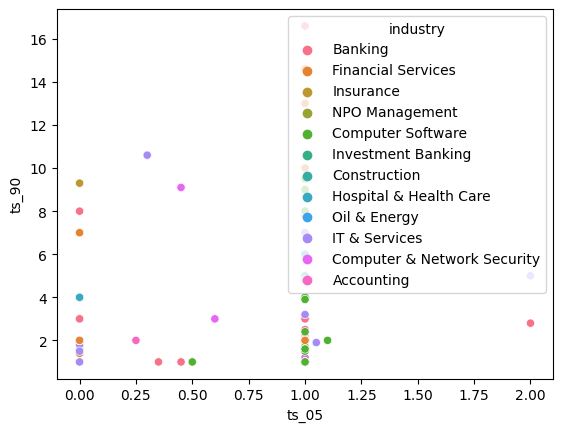

('ts_10', 'ts_25')


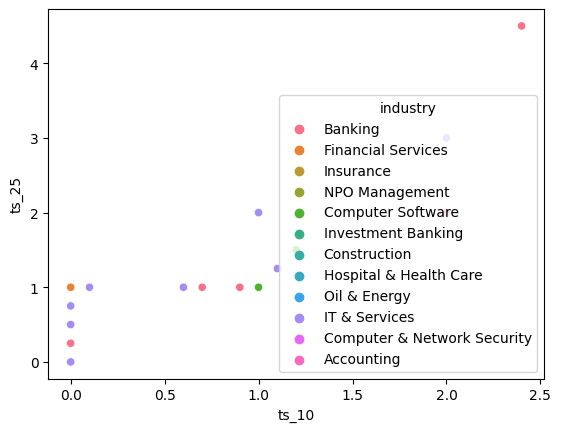

('ts_10', 'ts_50')


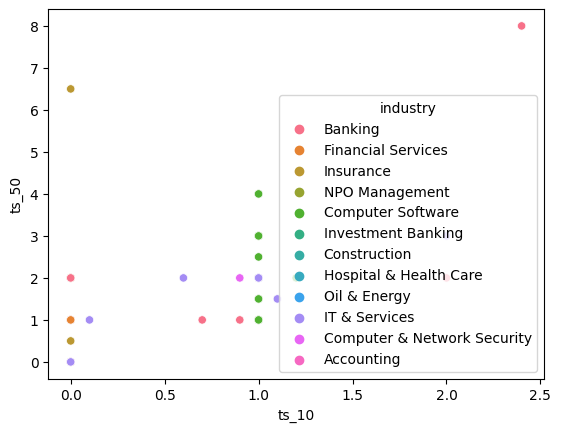

('ts_10', 'ts_75')


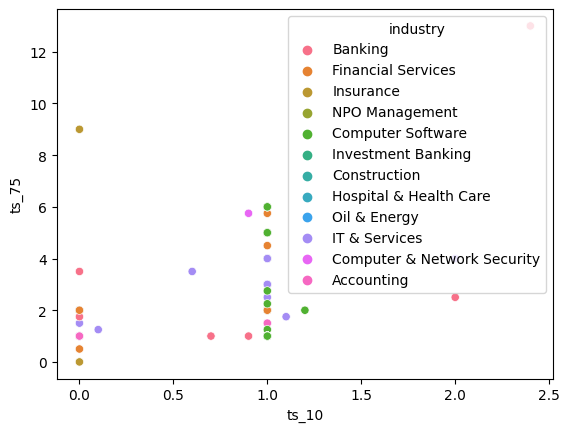

('ts_10', 'ts_90')


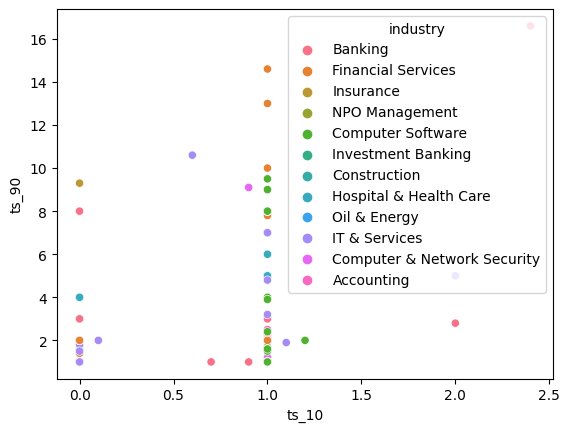

('ts_25', 'ts_50')


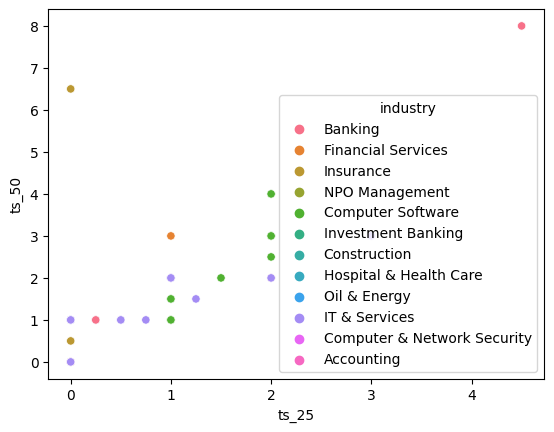

('ts_25', 'ts_75')


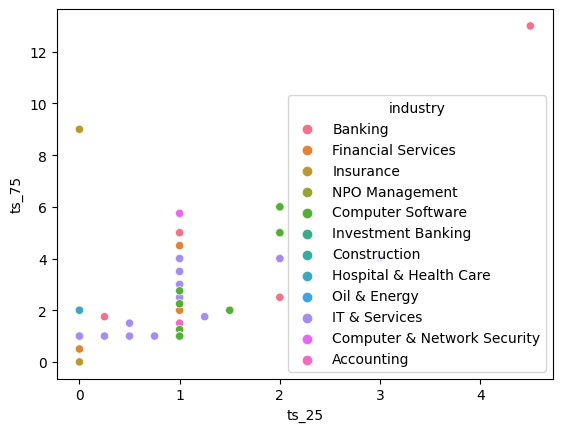

('ts_25', 'ts_90')


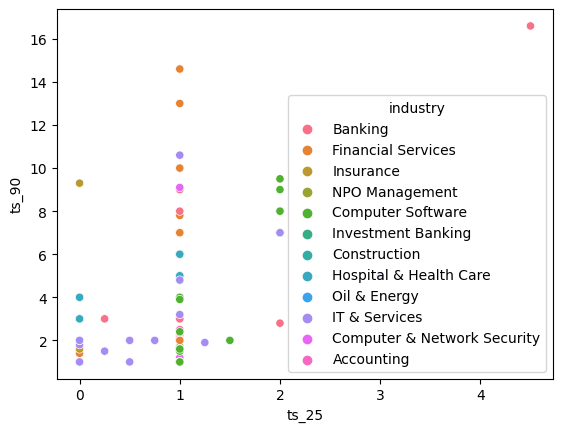

('ts_50', 'ts_75')


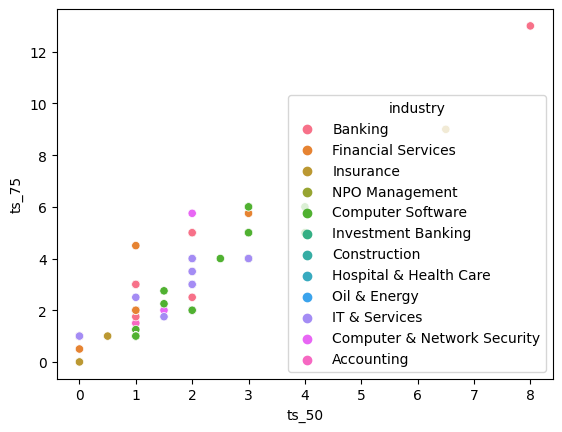

('ts_50', 'ts_90')


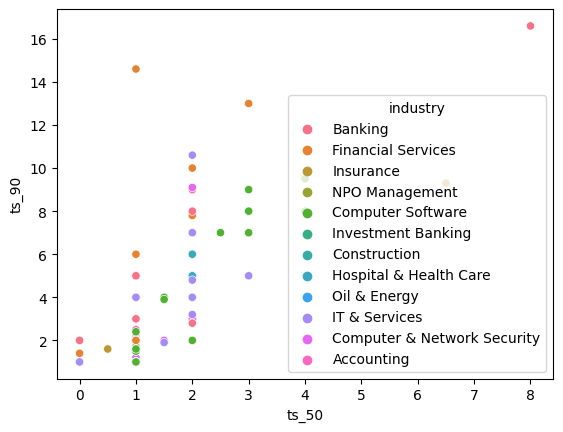

('ts_75', 'ts_90')


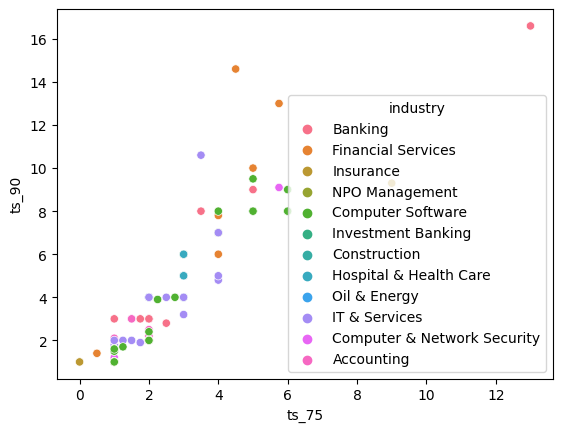

In [13]:
import itertools

kpi_combis = list(itertools.combinations(kpis, 2))
for combi in kpi_combis:
    print(combi)
    sns.scatterplot(data=data, x=combi[0], y=combi[1], hue='industry')
    plt.show()

In [14]:
len(kpis)

12

array([[<AxesSubplot:xlabel='ts_Std', ylabel='ts_Std'>,
        <AxesSubplot:xlabel='ts_Mean', ylabel='ts_Std'>,
        <AxesSubplot:xlabel='ts_Sum', ylabel='ts_Std'>],
       [<AxesSubplot:xlabel='ts_Std', ylabel='ts_Mean'>,
        <AxesSubplot:xlabel='ts_Mean', ylabel='ts_Mean'>,
        <AxesSubplot:xlabel='ts_Sum', ylabel='ts_Mean'>],
       [<AxesSubplot:xlabel='ts_Std', ylabel='ts_Sum'>,
        <AxesSubplot:xlabel='ts_Mean', ylabel='ts_Sum'>,
        <AxesSubplot:xlabel='ts_Sum', ylabel='ts_Sum'>]], dtype=object)

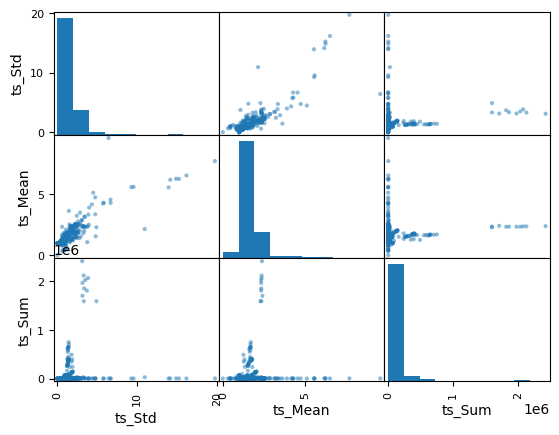

In [15]:
pd.plotting.scatter_matrix(data[kpis[:3]], alpha=0.5)

## Check correlation matrix to get a sense of features quality

- highly correlated variables don't add any information to the system
- 

<AxesSubplot:>

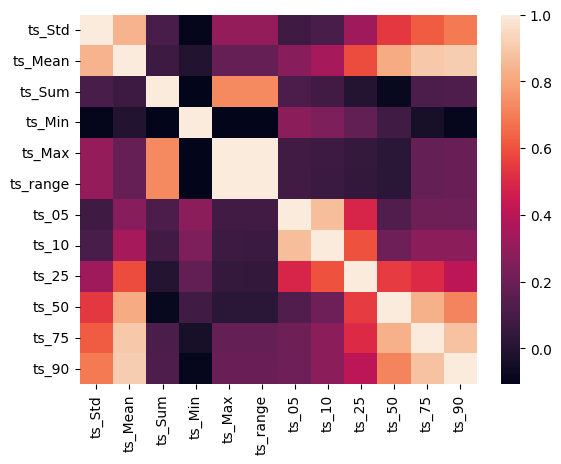

In [16]:
corr = data.drop(columns=['organisation','month','industry']).corr()
sns.heatmap(corr)

In [17]:
#X = data[data.organisation.isin(top10_orgs)].drop(columns=['organisation','week','industry'])
X=data.drop(columns=['organisation','month','industry','ts_75'])
X = StandardScaler().fit_transform(X)

In [18]:
X.shape

(460, 11)

### Try: DBSCAN, Spectral Clustering, Optics

### Silhouette Plots for KMeans
The Silhouette Coefficient is defined for each sample and is composed of two scores:

**a**: The mean distance between a sample and all other points in the same class.

**b**: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:

$$c = \frac{b-a}{max(a,b)}$$

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

### Try HDBSCAN

In [19]:
import hdbscan
clusterer = hdbscan.RobustSingleLinkage(cut=0.125, k=3)
cluster_labels = clusterer.fit_predict(X)
hierarchy = clusterer.cluster_hierarchy_

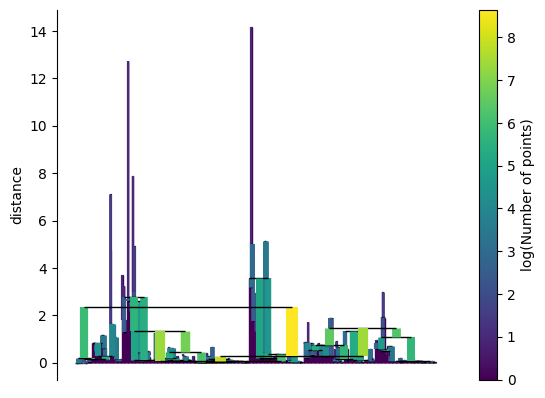

In [20]:
alt_labels = hierarchy.get_clusters(0.100, 5)
hierarchy.plot()
plt.show()

In [21]:
from sklearn.decomposition import PCA

for i in range(10):
    pca = PCA(n_components=i, svd_solver='full')
    pca.fit(X)
    print('n components', i, ', score ', pca.score(X))

n components 0 , score  -15.608336880336545
n components 1 , score  -14.444782781917409
n components 2 , score  -13.447327524428747
n components 3 , score  -12.23738343218583
n components 4 , score  -11.685331692389848
n components 5 , score  -11.340992275510008
n components 6 , score  -10.929426694564931
n components 7 , score  -10.464670920198774
n components 8 , score  -10.006826805449503
n components 9 , score  -8.604383599346448


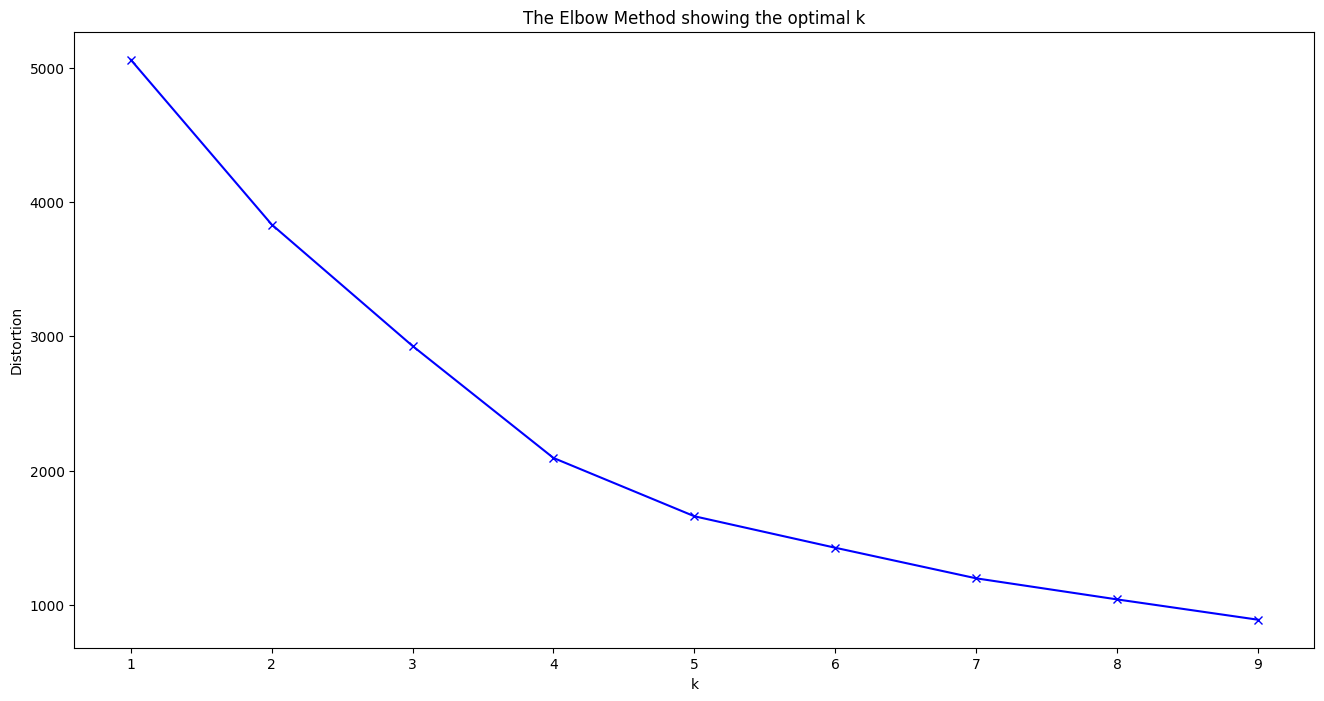

In [22]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

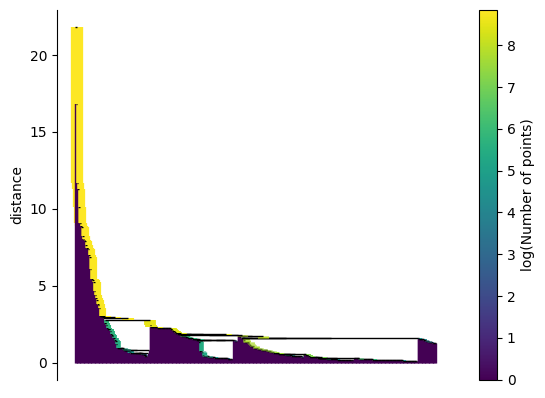

In [47]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=26, gen_min_span_tree=True,cluster_selection_epsilon=0.05, cluster_selection_method = 'leaf') #cluster_selection_method 'eom' or 'leaf'
cluster_labels = clusterer.fit_predict(X)
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)
plt.show()

<AxesSubplot:ylabel='$\\lambda$ value'>

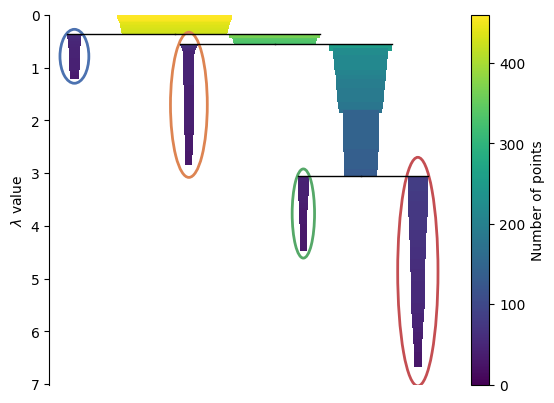

In [48]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette('deep', 5))

## Check cluster numbers

In [49]:
data['cluster_label'] = clusterer.labels_
data.head(3)

organisation    month    ts_Std   ts_Mean  ts_Sum  ts_Min  ts_Max  ts_range  \
0       Esprit  2022-01  1.265017  1.611043  611473       0      55        55   
1       Esprit  2022-02  1.293972  1.636785  549711       0      85        85   
2       Esprit  2022-03  1.328397  1.661481  637221       0      71        71   

   ts_05  ts_10  ts_25  ts_50  ts_75  ts_90 industry  cluster_label  
0    1.0    1.0    1.0    1.0    2.0    3.0  Banking             -1  
1    1.0    1.0    1.0    1.0    2.0    3.0  Banking             -1  
2    1.0    1.0    1.0    1.0    2.0    3.0  Banking             -1

In [50]:
data.cluster_label.nunique()

5

### cluster evolution over time

In [43]:
data[data.organisation.isin(top10_orgs)].groupby(['organisation','industry'])['cluster_label'].nunique()

organisation                  industry          
Avaloq Sourcing Europe AG     Computer Software     3
Bank Avera                    Banking               2
Clientis                      Banking               1
Esprit                        Banking               1
Johanniter Unfall Hilfe e.V.  NPO Management        1
KPT Krankenkasse AG           Insurance             2
Qonto                         Banking               1
Santander Consumer            Banking               2
VZ Depotbank                  Financial Services    1
Viva Wallet                   Financial Services    2
Name: cluster_label, dtype: int64

In [51]:
data[~data.organisation.isin(top10_orgs)].groupby('organisation')['cluster_label'].nunique()

organisation
AMNIS Treasury Services                  2
Arbonia Services AG                      2
Artbanx                                  2
Banca Credinvest                         2
Bedag                                    2
Beyond-SW                                1
Bühler AG                                4
C2SEC                                    2
Doc.Series SA                            3
Econis AG                                3
EquipmentConnect                         1
Ergon Airlock                            2
Frankfurter Bankgesellschaft             2
Futurae                                  1
HIN                                      2
Hystrix Medical                          2
ISPIN AG (Official)                      2
LLB                                      3
Lienhardt & Partner Privatbank Zürich    3
Migros Bank                              3
Netcetera                                1
OBT                                      5
Oskar                                    

In [52]:
data.cluster_label.value_counts()

-1    202
 3     81
 1     74
 0     58
 2     45
Name: cluster_label, dtype: int64

In [30]:
data.groupby('cluster_label')['industry'].value_counts().to_frame()

industry
cluster_label industry                             
-1            Banking                            79
              Computer Software                  30
              Financial Services                 29
              IT & Services                      14
              Hospital & Health Care             10
              NPO Management                     10
              Construction                        4
              Computer & Network Security         2
              Insurance                           2
              Oil & Energy                        2
              Accounting                          1
              Investment Banking                  1
 0            Computer Software                  21
              Banking                             7
              Computer & Network Security         6
              IT & Services                       6
              Accounting                          5
              Hospital & Health Care              4
              Financial Services                  1
 1            Insurance                          18
              Financial Services                 13
              Computer Software                  10
              IT & Services                       9
              Investment Banking                  9
              Banking                             8
              Hospital & Health Care              6
              Accounting                          1
 2            Financial Services                 20
              Banking                            11
              Computer Software                   5
              IT & Services                       2
              Accounting                          1
 3            Banking                            31
              IT & Services                       9
              Financial Services                  8
              Oil & Energy                        8
              Construction                        6
              Accounting                          2
              Computer Software                   1

In [31]:
data[data.cluster_label==3]['organisation'].value_counts().to_frame()

organisation
Zuercher Landbank                                10
Futurae                                          10
Bank Avera                                        8
WWZ Energie AG                                    8
AMNIS Treasury Services                           8
Econis AG                                         7
Arbonia Services AG                               6
Banca Credinvest                                  5
Frankfurter Bankgesellschaft                      3
Bedag                                             2
LLB                                               2
Ergon Airlock                                     2
OBT                                               2
Migros Bank                                       2
Bühler AG                                         2
Lienhardt & Partner Privatbank Zürich             1
Avaloq Sourcing Europe AG                         1
Yapeal                                            1
SZKB                                              1

In [32]:
data[data.organisation=='Viva Wallet'].cluster_label.unique()

array([-1,  1])

In [33]:
#data.loc[data.organisation=='Zuercher Landbank','industry'] = 'Banking'
data.loc[data.organisation=='Zuercher Landbank']

organisation    month    ts_Std   ts_Mean  ts_Sum  ts_Min  ts_Max  \
0  Zuercher Landbank  2022-01  1.269543  1.657287   11838       0      17   
1  Zuercher Landbank  2022-02  1.364140  1.731090   13892       0      30   
2  Zuercher Landbank  2022-03  1.333729  1.728420   18622       0      25   
3  Zuercher Landbank  2022-04  1.302268  1.745267   17053       0      15   
4  Zuercher Landbank  2022-05  1.437661  1.825511   18591       0      30   
5  Zuercher Landbank  2022-06  1.364703  1.774587   17304       0      19   
6  Zuercher Landbank  2022-07  1.427664  1.799420   18005       0      29   
7  Zuercher Landbank  2022-08  1.428253  1.817915   17941       0      28   
8  Zuercher Landbank  2022-09  1.380884  1.807042   18065       0      18   
9  Zuercher Landbank  2022-10  1.398210  1.795104   10706       0      19   

   ts_range  ts_05  ts_10  ts_25  ts_50  ts_75  ts_90 industry  cluster_label  
0        17    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
1        30    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
2        25    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
3        15    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
4        30    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
5        19    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
6        29    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
7        28    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
8        18    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3  
9        19    1.0    1.0    1.0    1.0    2.0    3.0  Banking              3

In [34]:
data[data.industry.isna()].organisation.unique().tolist()

['Bedag',
 'i-exceed',
 'LLB',
 'Futurae',
 'Procare',
 'Radicant',
 'Bühler AG',
 'terreActive AG']

In [35]:
data[data.cluster_label==-1].organisation.unique().tolist()

['Esprit',
 'Qonto',
 'Clientis',
 'Santander Consumer',
 'Viva Wallet',
 'KPT Krankenkasse AG',
 'Unlimint',
 'VZ Depotbank',
 'Johanniter Unfall Hilfe e.V.',
 'Bank Avera',
 'Avaloq Sourcing Europe AG',
 'Frankfurter Bankgesellschaft',
 'Sygnum',
 'SZKB',
 'Yapeal',
 'Partners Group AG',
 'Rothschild & Co',
 'Lienhardt & Partner Privatbank Zürich',
 'Arbonia Services AG',
 'Banca Credinvest',
 'Valiant',
 'HIN',
 'i-exceed',
 'WWZ Energie AG',
 'Netcetera',
 'LLB',
 'Swisspeers',
 'Hystrix Medical',
 'Ergon Airlock',
 'Beyond-SW',
 'ISPIN AG (Official)',
 'Econis AG',
 'Webmob Software Solutions',
 'C2SEC',
 'Radicant',
 'OBT',
 'Artbanx',
 'Bühler AG',
 'Doc.Series SA',
 'additiv']

In [38]:
data.cluster_label.value_counts()

-1    202
 3     81
 1     74
 0     58
 2     45
Name: cluster_label, dtype: int64

## Plot clusters in feature variables (with noise removed)

('ts_Std', 'ts_Mean')


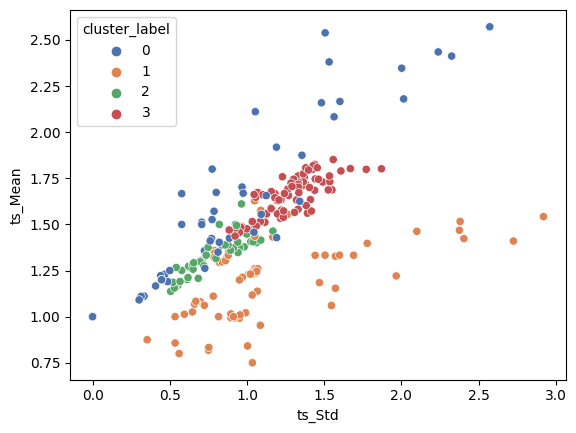

('ts_Std', 'ts_Sum')


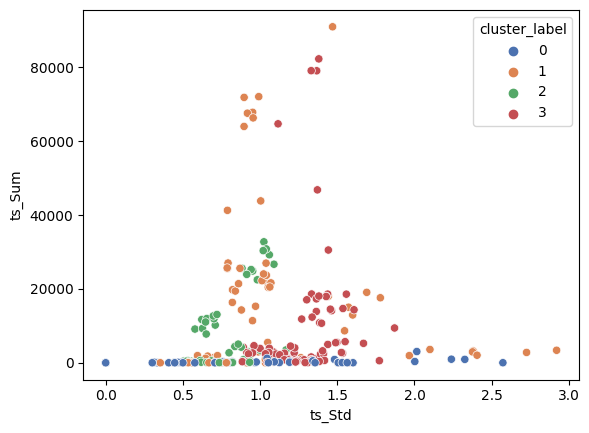

('ts_Std', 'ts_Min')


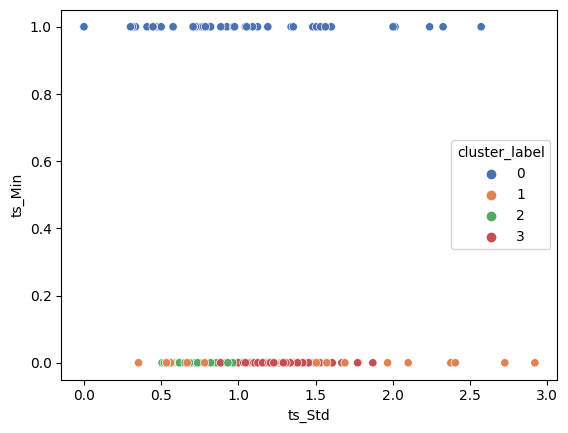

('ts_Std', 'ts_Max')


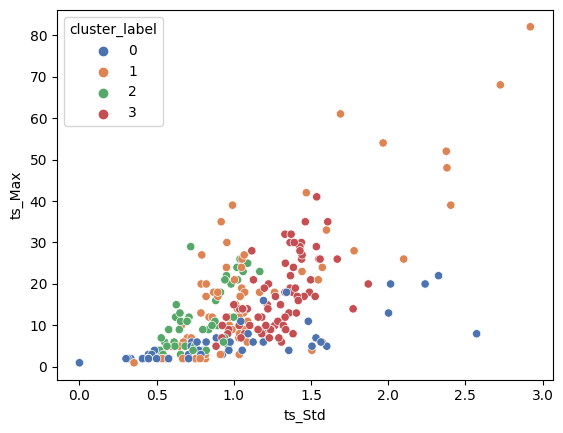

('ts_Std', 'ts_range')


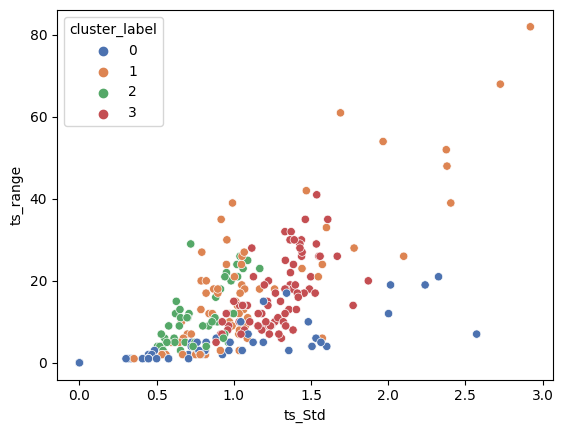

('ts_Std', 'ts_05')


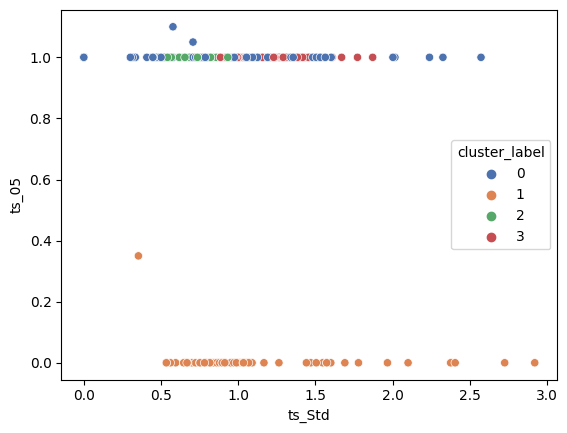

('ts_Std', 'ts_10')


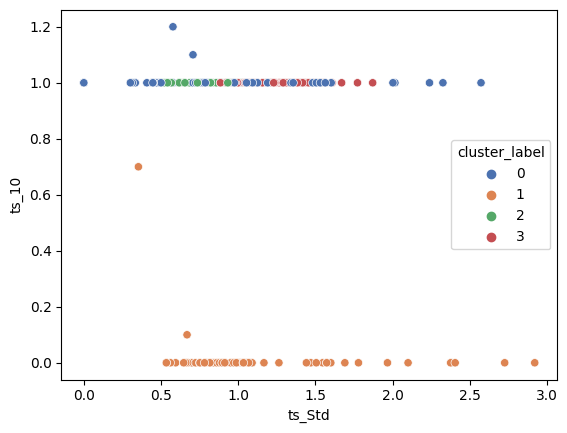

('ts_Std', 'ts_25')


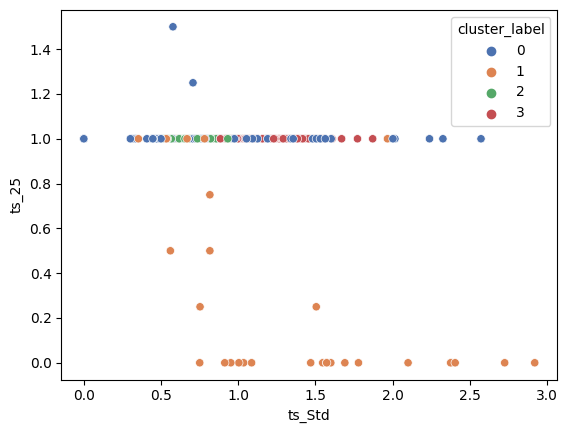

('ts_Std', 'ts_50')


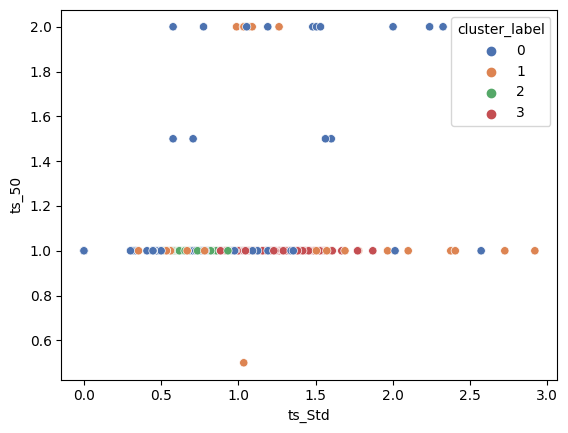

('ts_Std', 'ts_75')


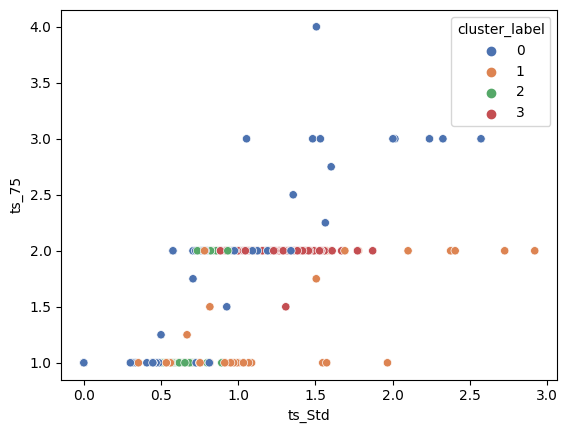

('ts_Std', 'ts_90')


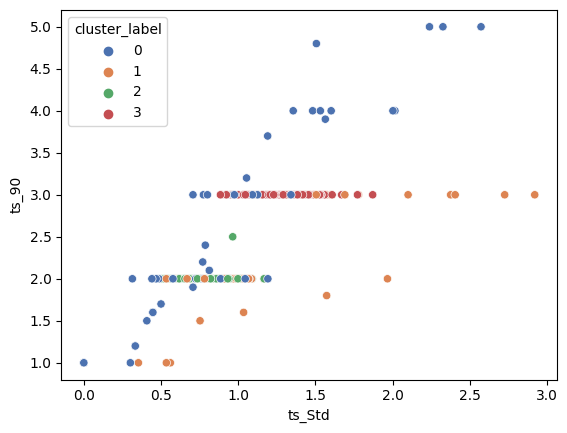

('ts_Mean', 'ts_Sum')


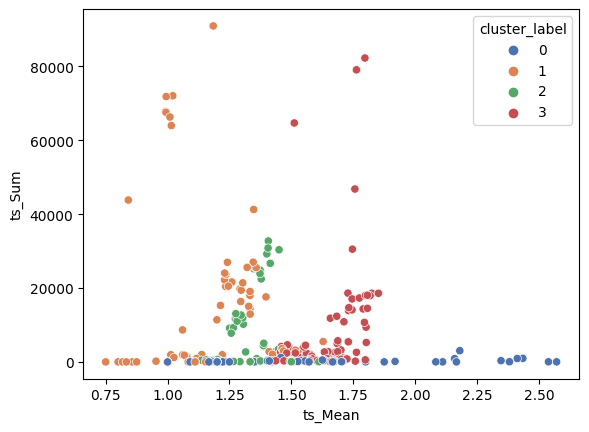

('ts_Mean', 'ts_Min')


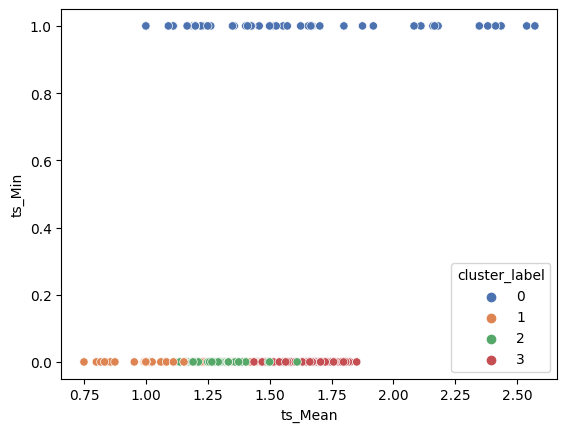

('ts_Mean', 'ts_Max')


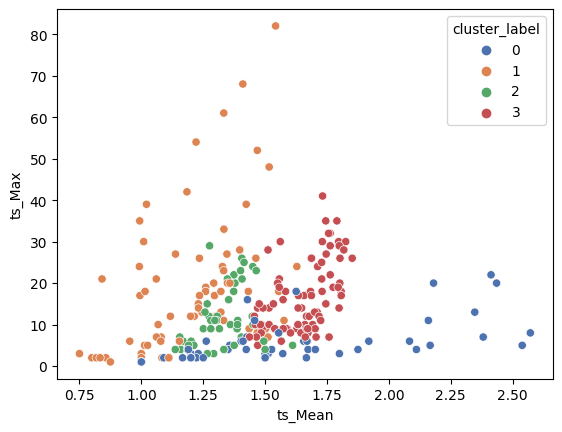

('ts_Mean', 'ts_range')


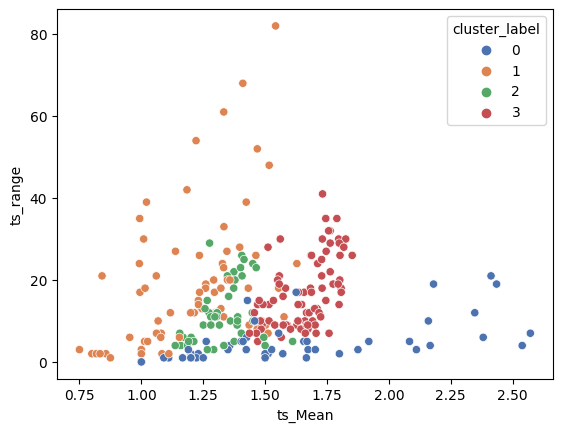

('ts_Mean', 'ts_05')


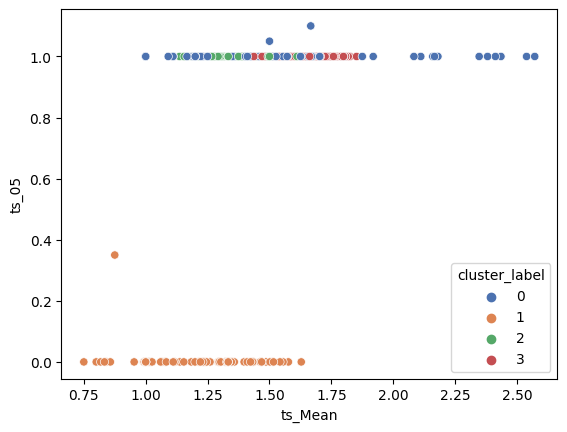

('ts_Mean', 'ts_10')


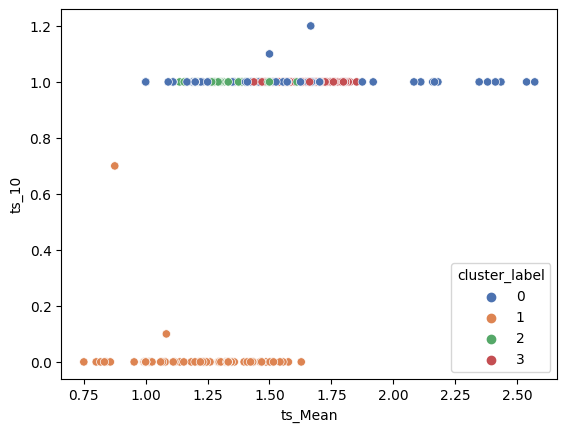

('ts_Mean', 'ts_25')


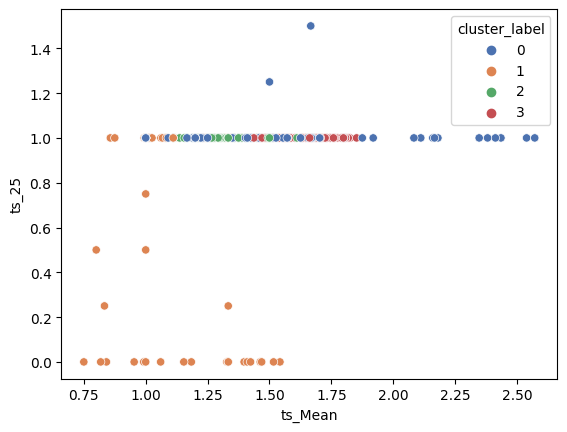

('ts_Mean', 'ts_50')


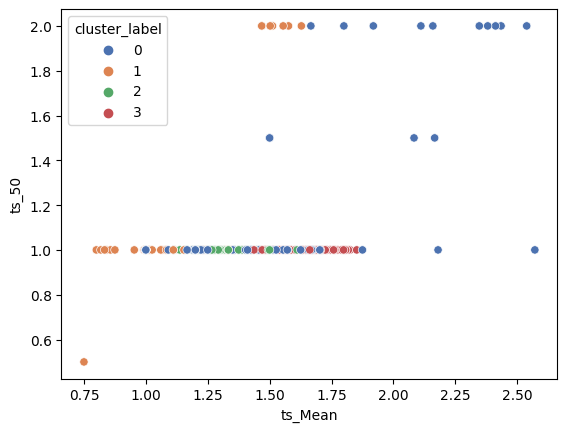

('ts_Mean', 'ts_75')


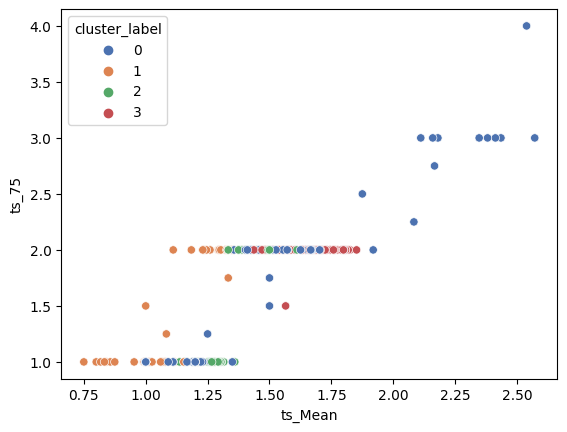

('ts_Mean', 'ts_90')


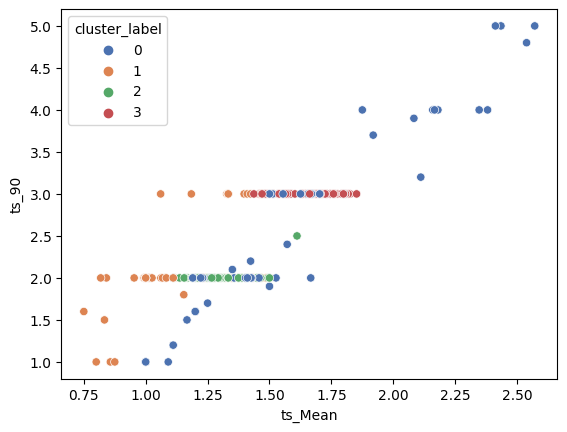

('ts_Sum', 'ts_Min')


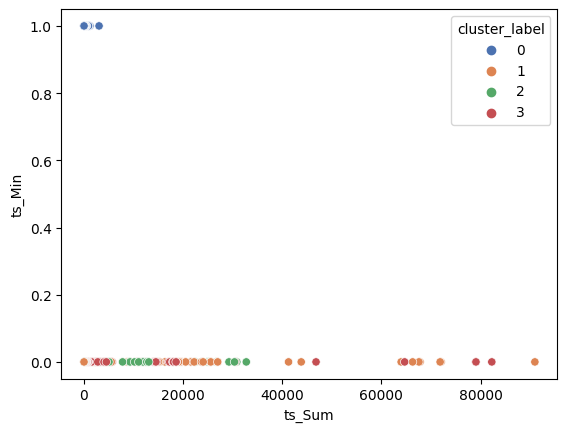

('ts_Sum', 'ts_Max')


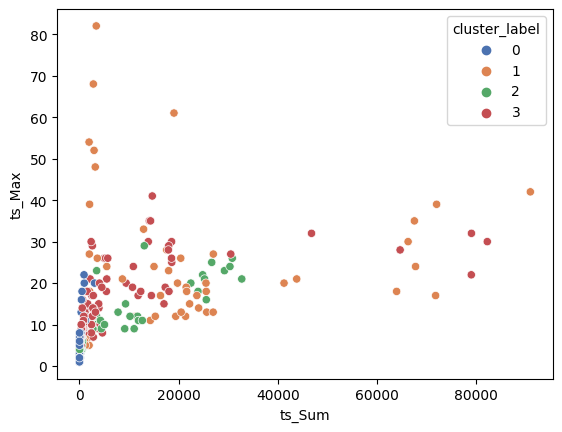

('ts_Sum', 'ts_range')


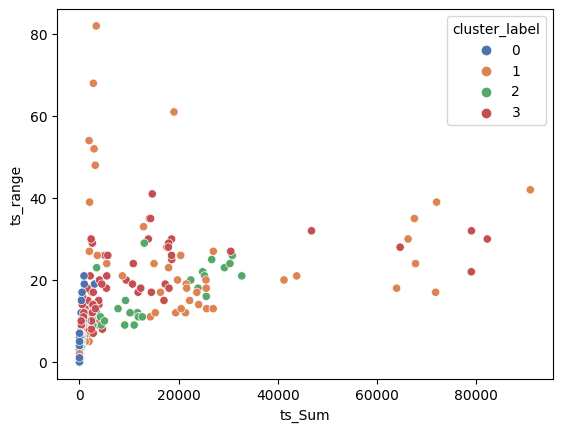

('ts_Sum', 'ts_05')


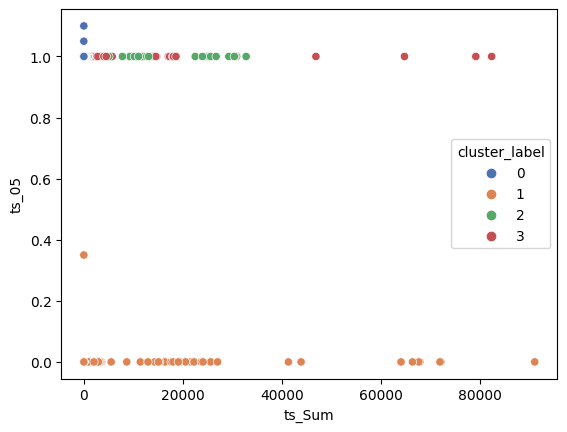

('ts_Sum', 'ts_10')


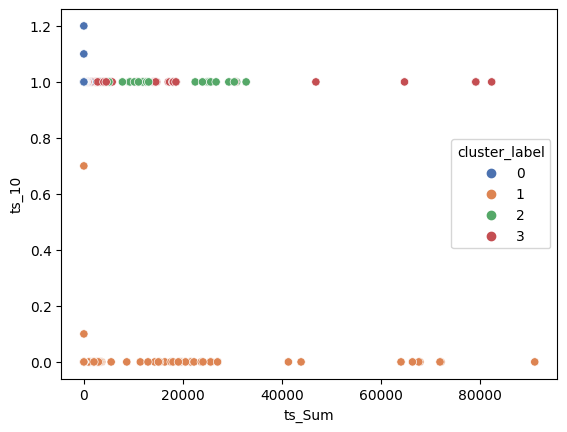

('ts_Sum', 'ts_25')


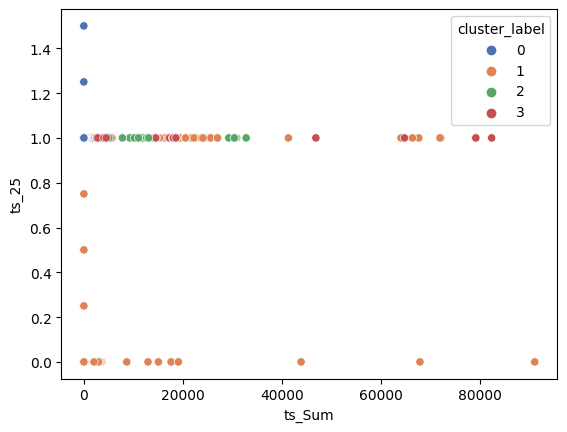

('ts_Sum', 'ts_50')


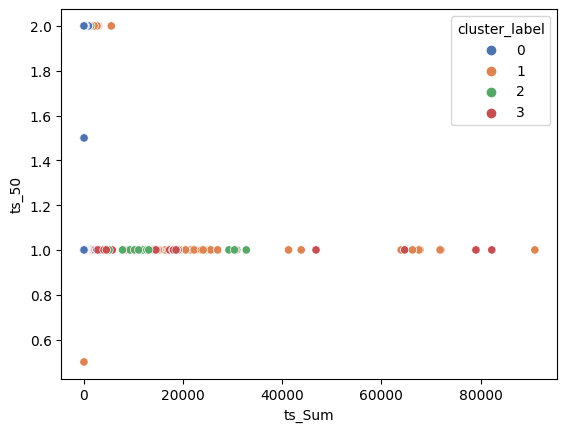

('ts_Sum', 'ts_75')


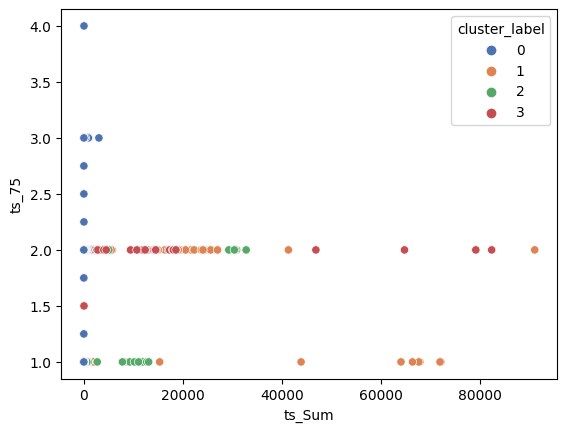

('ts_Sum', 'ts_90')


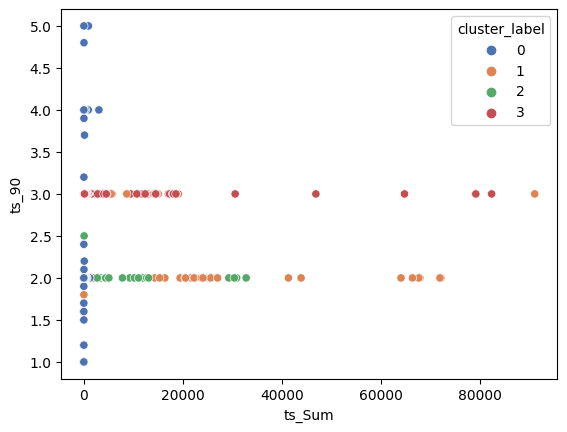

('ts_Min', 'ts_Max')


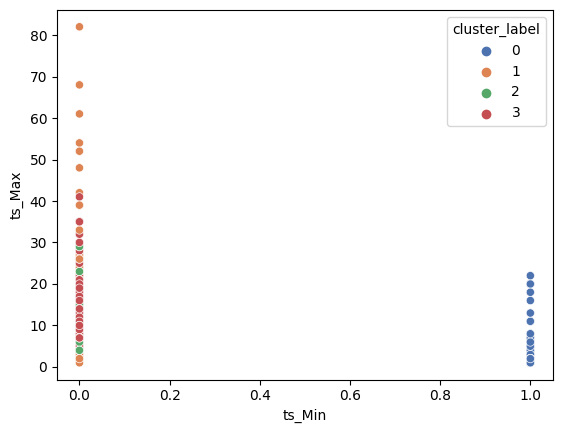

('ts_Min', 'ts_range')


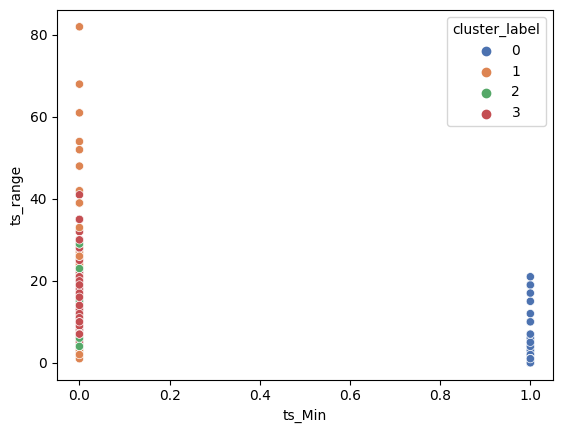

('ts_Min', 'ts_05')


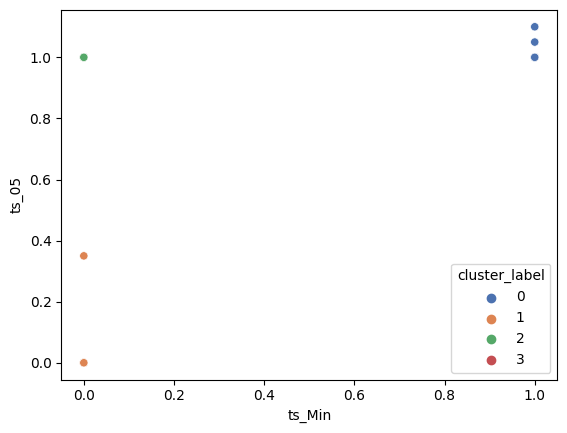

('ts_Min', 'ts_10')


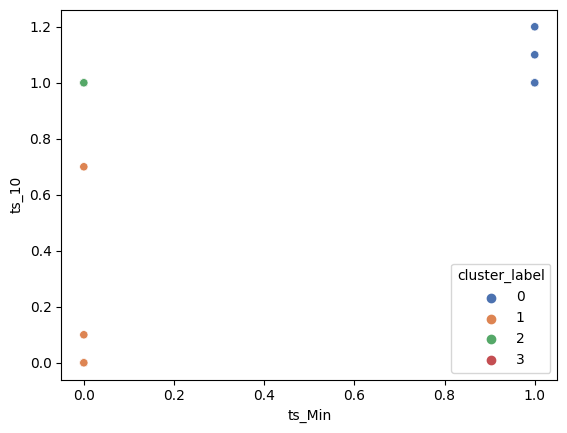

('ts_Min', 'ts_25')


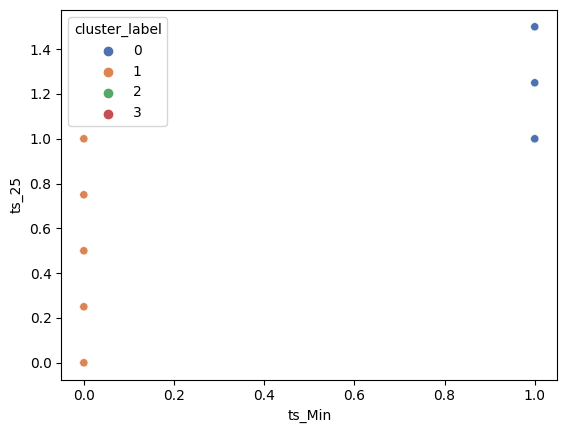

('ts_Min', 'ts_50')


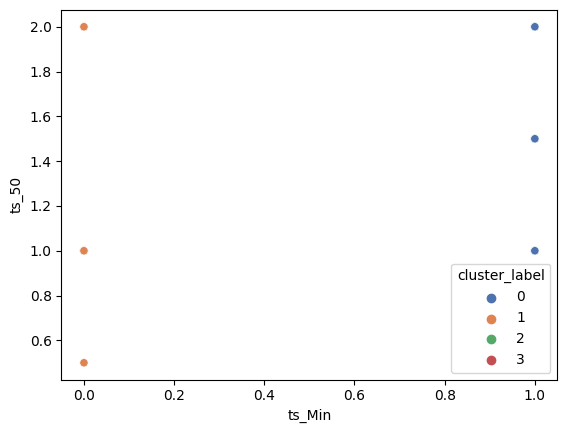

('ts_Min', 'ts_75')


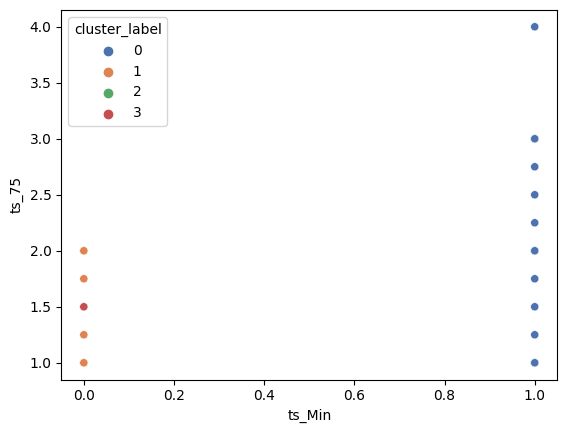

('ts_Min', 'ts_90')


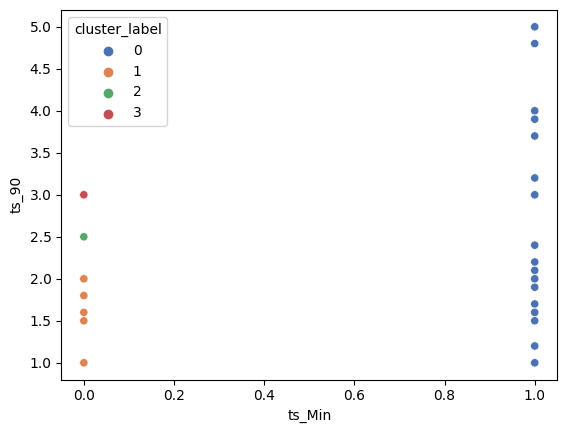

('ts_Max', 'ts_range')


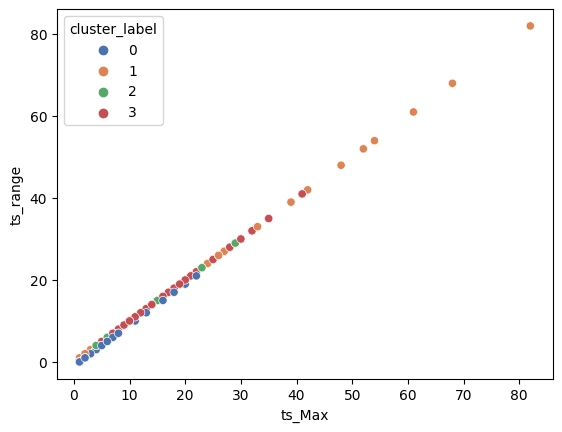

('ts_Max', 'ts_05')


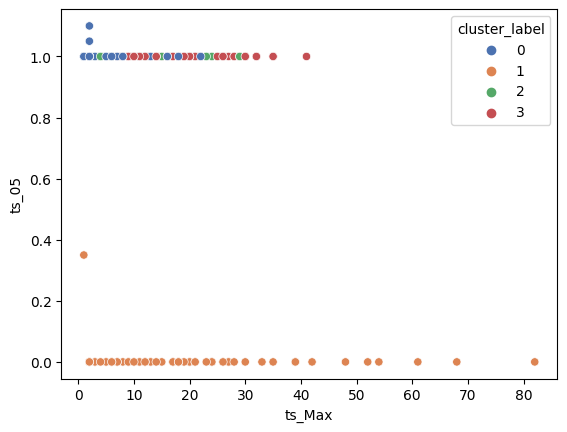

('ts_Max', 'ts_10')


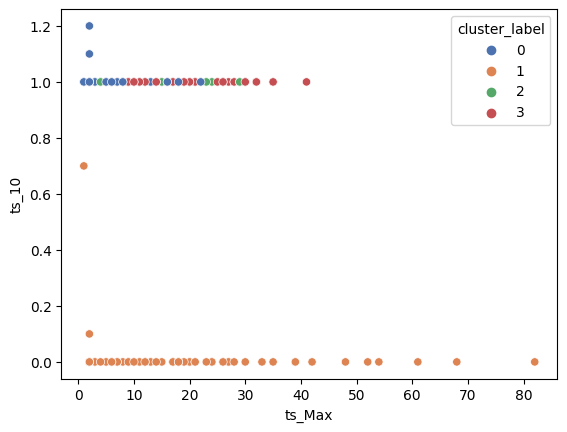

('ts_Max', 'ts_25')


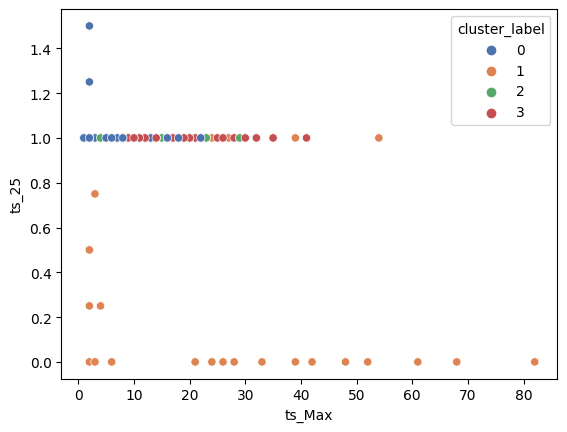

('ts_Max', 'ts_50')


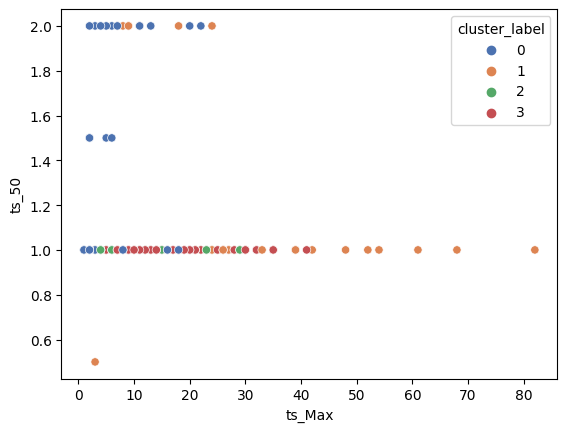

('ts_Max', 'ts_75')


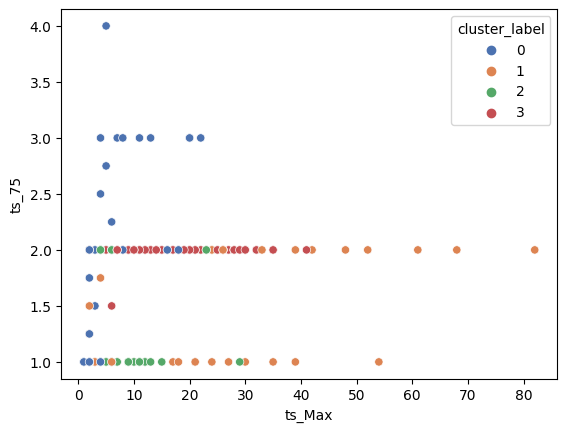

('ts_Max', 'ts_90')


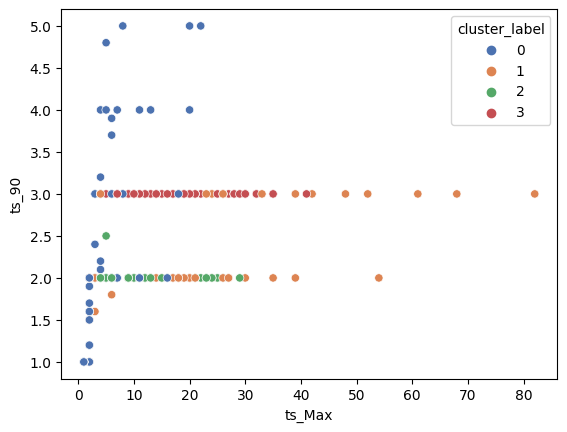

('ts_range', 'ts_05')


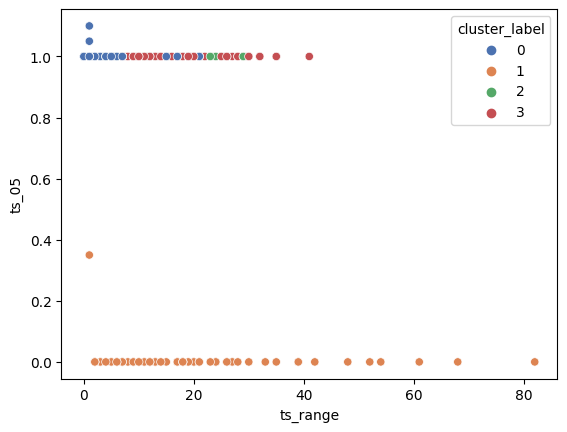

('ts_range', 'ts_10')


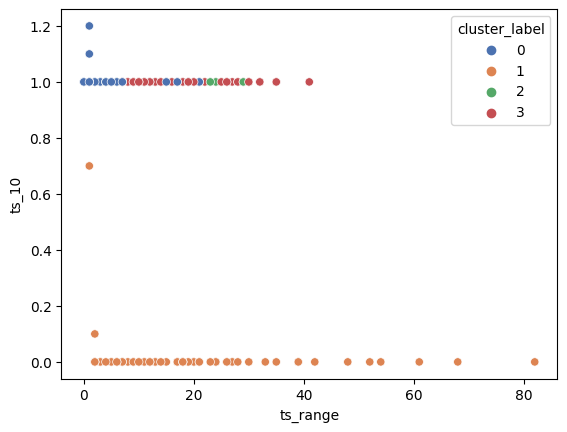

('ts_range', 'ts_25')


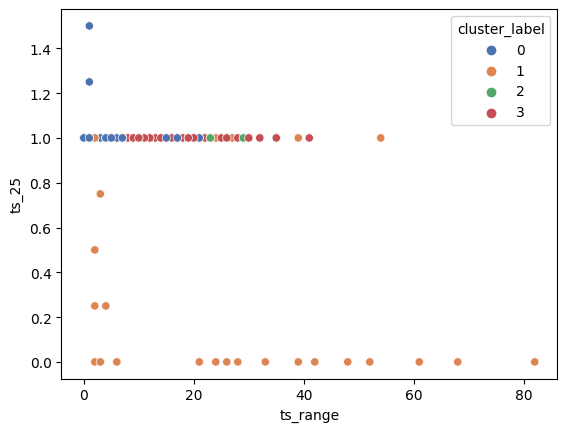

('ts_range', 'ts_50')


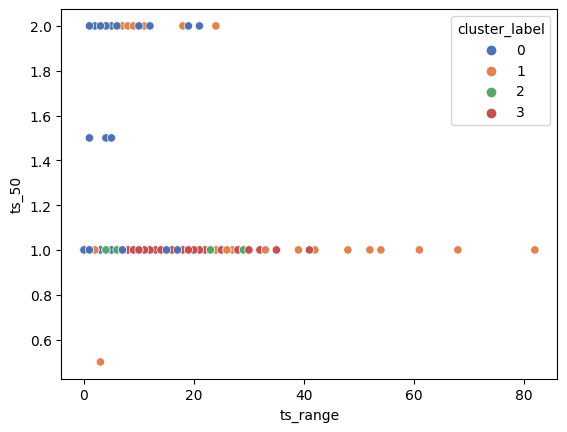

('ts_range', 'ts_75')


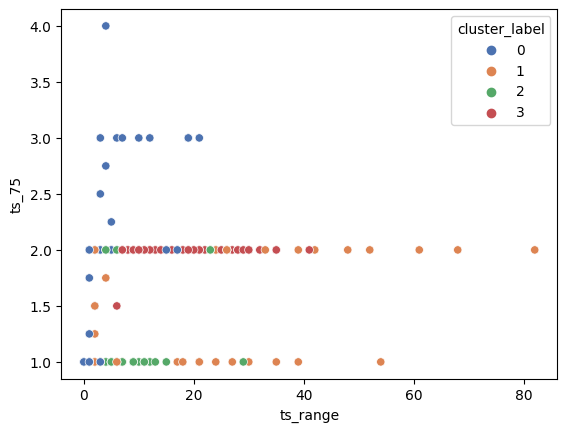

('ts_range', 'ts_90')


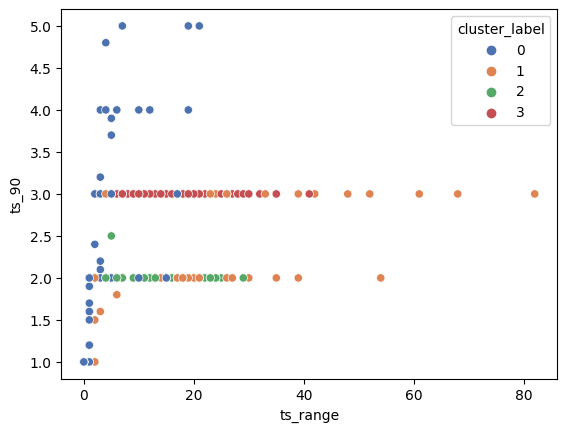

('ts_05', 'ts_10')


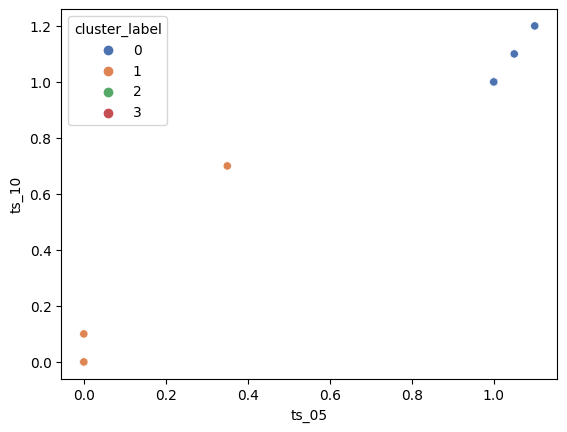

('ts_05', 'ts_25')


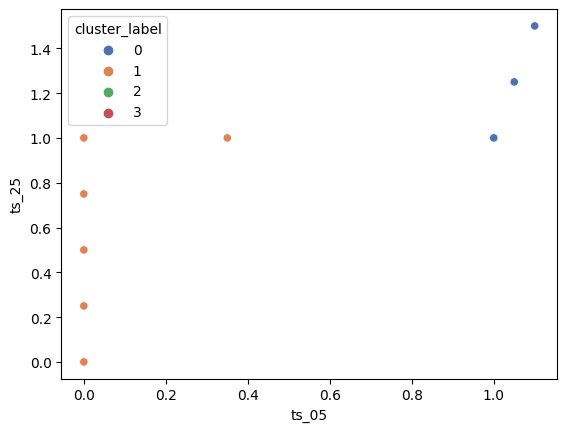

('ts_05', 'ts_50')


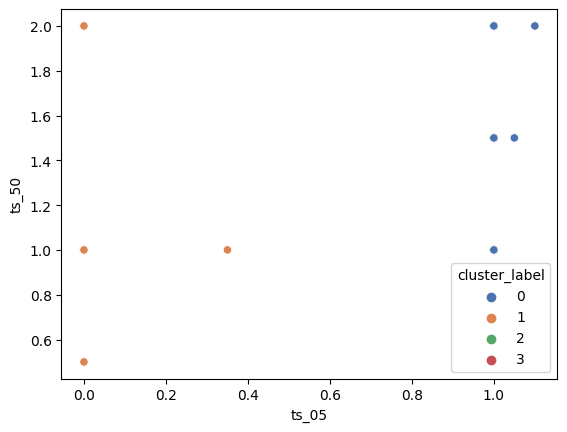

('ts_05', 'ts_75')


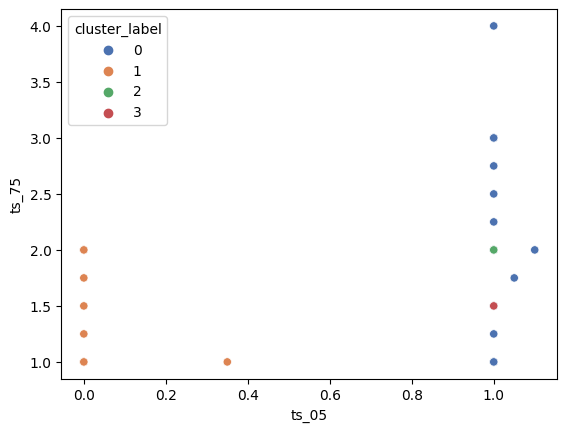

('ts_05', 'ts_90')


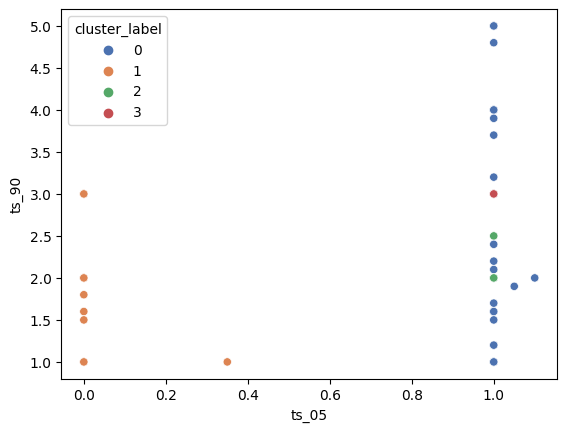

('ts_10', 'ts_25')


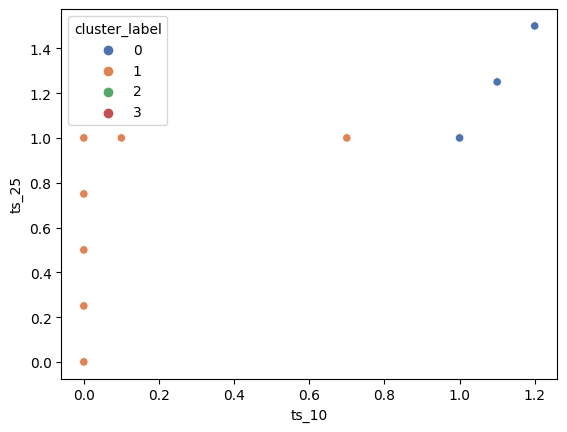

('ts_10', 'ts_50')


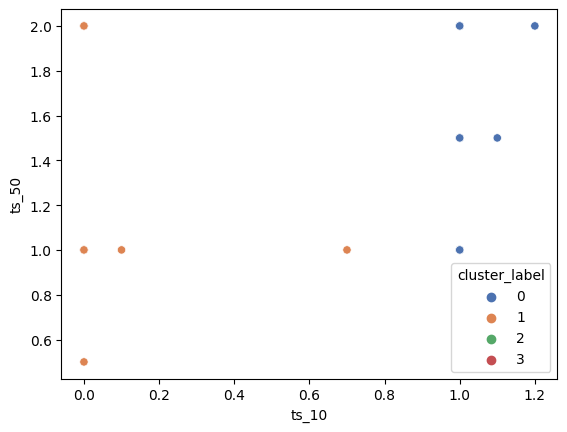

('ts_10', 'ts_75')


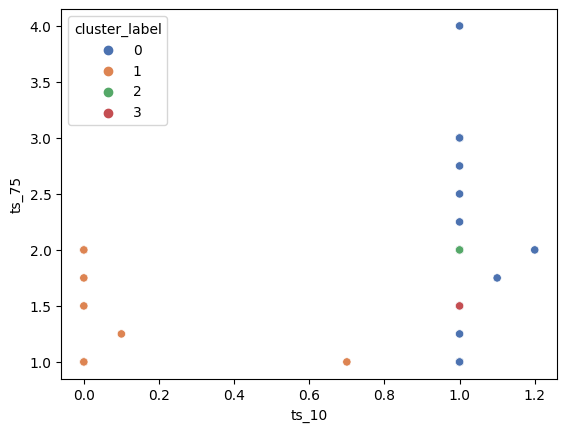

('ts_10', 'ts_90')


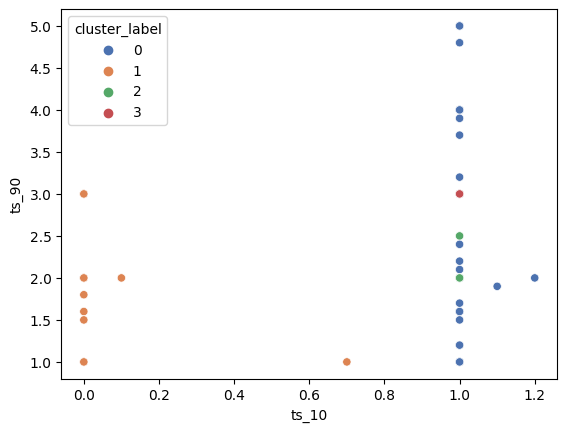

('ts_25', 'ts_50')


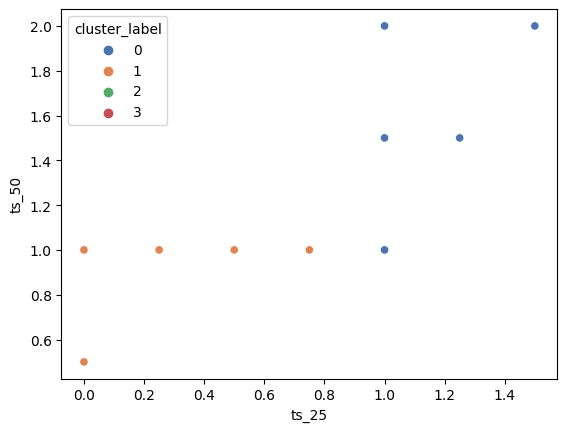

('ts_25', 'ts_75')


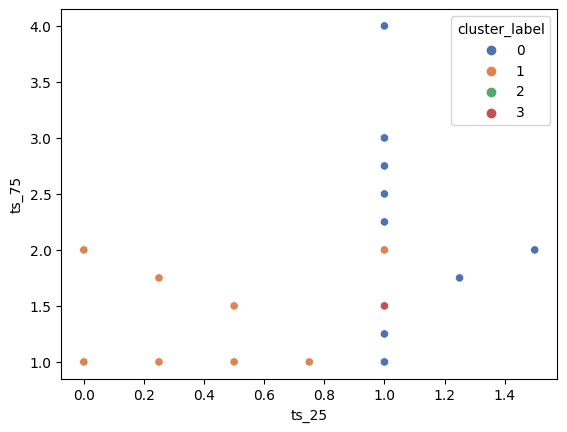

('ts_25', 'ts_90')


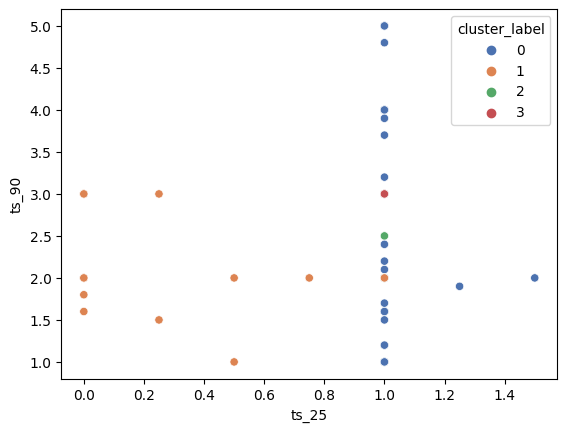

('ts_50', 'ts_75')


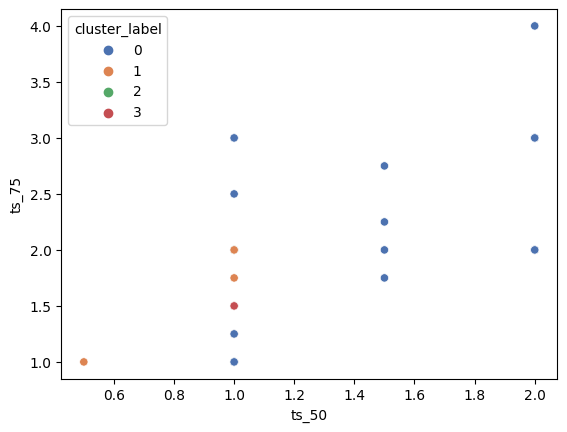

('ts_50', 'ts_90')


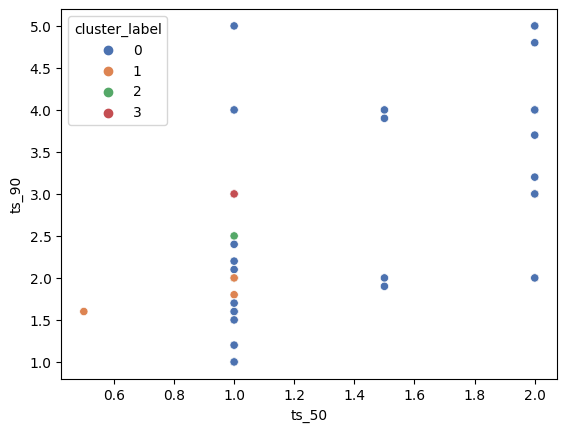

('ts_75', 'ts_90')


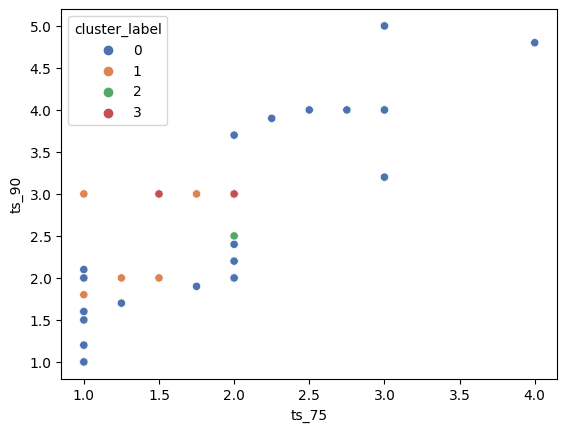

In [36]:
#print(data[data.cluster_label!=-1].cluster_label.value_counts())

kpi_combis = list(itertools.combinations(kpis, 2))
for combi in kpi_combis:
    print(combi)
    sns.scatterplot(data=data[data.cluster_label!=-1], x=combi[0], y=combi[1], hue='cluster_label',palette='deep')
    #sns.scatterplot(data=data, x=combi[0], y=combi[1], hue='cluster_label',palette='deep')
    plt.show()

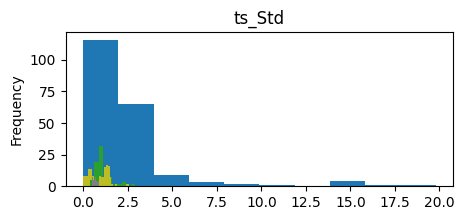

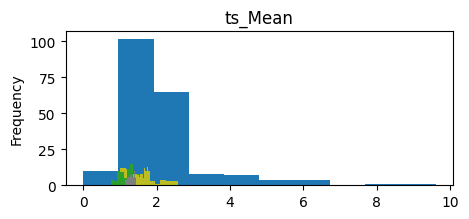

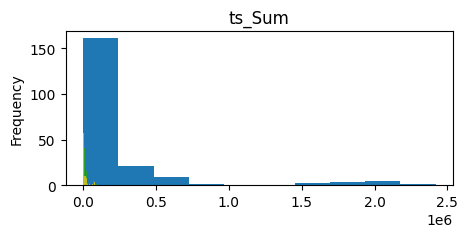

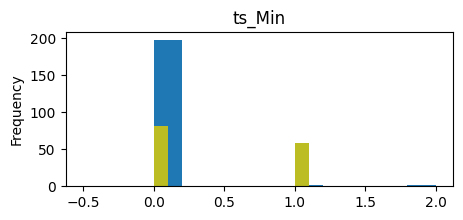

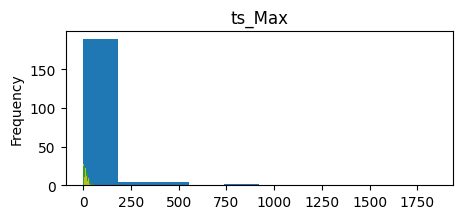

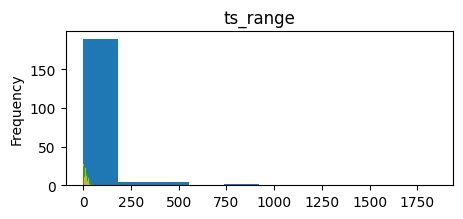

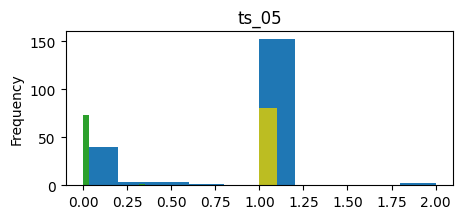

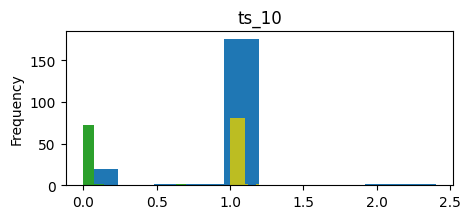

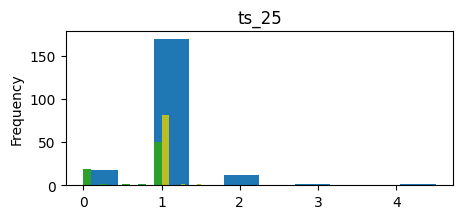

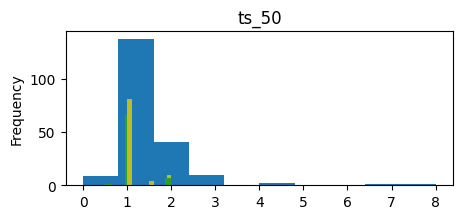

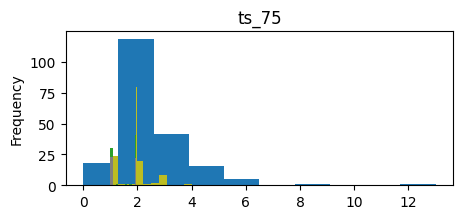

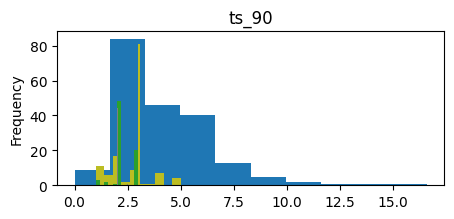

In [37]:
for col in kpis:
    fig, ax = plt.subplots(1, 1, figsize=(5, 2))
    for clust in sorted(list(cluster_labels))[1:]:
        tmp = data[data.cluster_label==clust]
        #print(tmp.head(3))
        ax = tmp[col].plot(kind='hist')#,stacked=True)
        ax.set_title(col)
    plt.show()